# **EVALUACION 2 MINERIA DE DATOS 2024 (BIY7121_004V) - TEMPERATURA**

Alumno: **Cristóbal Cabezas Espinoza**

In [4]:
# Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_samples, silhouette_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.linear_model import LinearRegression, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from kneed import KneeLocator
from pathlib import Path

## **1. BUSSINESS UNDERSTANDING**

### 1.1. **Contexto** 

Se nos ha entregado un dataset correspondiente a las estadísticas del tiempo de Australia entre los años 2007 y 2017, con información acerca de las condiciones meteorológicas de distintas ciudades del mencionado país respecto del cual se nos ha solicitado 

### 1.2. **Definición de columnas**

* **Date**: Fecha de la observación meteorológica.
* **Location**: Nombre de la estación meteorológica.
* **MinTemp**: Temperatura mínima del día (°C).
* **MaxTemp**: Temperatura máxima del día (°C).
* **Rainfall**: Cantidad de lluvia caída en el día (mm).
* **Evaporation**: Cantidad de evaporación en 24 horas hasta las 9 am (mm).
* **Sunshine**: Horas de sol en el día.
* **WindGustDir**: Dirección del viento más fuerte del día.
* **WindGustSpeed**: Velocidad del viento más fuerte del día (km/h).
* **WindDir9am**: Dirección del viento a las 9 am.
* **WindDir3pm**: Dirección del viento a las 3 pm.
* **WindSpeed9am**: Velocidad del viento a las 9 am (km/h).
* **WindSpeed3pm**: Velocidad del viento a las 3 pm (km/h).
* **Humidity9am**: Humedad relativa a las 9 am (%).
* **Humidity3pm**: Humedad relativa a las 3 pm (%).
* **Pressure9am**: Presión atmosférica a las 9 am (hPa).
* **Pressure3pm**: Presión atmosférica a las 3 pm (hPa).
* **Cloud9am**: Octavos de cielo nublado a las 9 am.
* **Cloud3pm**: Octavos de cielo nublado a las 3 pm.
* **Temp9am**: Temperatura a las 9 am (°C).
* **Temp3pm**: Temperatura a las 3 pm (°C).
* **RainToday**: Indica si llovió hoy (Yes = Sí, No = No).
* **RainTomorrow**: Indica si llovió al día siguiente (variable objetivo, Yes = Sí, No = No).
* **RISK_MM**: Cantidad de lluvia registrada en milímetros durante el día siguiente al de la observación.

### 1.3. Objetivo

Vamos a desarrollar modelos predictivos que nos permitan predecir determinados eventos meteorológicos asociados a los datos entrenados. En concreto, se han planteado dos modelos:

* Modelos de regresión para pronosticar la temperatura;
* Modelos de clasificación para pronosticar si llueve mañana o no.

Para ello se procederá a la realización de una análisis exploratorio de los datos, y luego se seleccionará un target, junto a sus respectivas variables con mejor correlación, con el objetivo de poder hacer predicciones precisas.

## **2. DATA UNDERSTANDING**

En primer lugar, cargamos nuestro dataset:

In [5]:
# Cargamos el dataset
temperature_df = pd.read_csv("temperatura.csv", delimiter=',')

### **2.1. EDA**

Vamos a explorar un poco los datos de nuestro dataset:

In [6]:
# Numero total de filas y columnas, respectivamente
print('N° filas: ', temperature_df.shape[0])
print('N° columnas: ', temperature_df.shape[1])

N° filas:  142193
N° columnas:  24


In [7]:
# Descripcion de cada columna
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [8]:
# Mostramos los primeros 5 registros
temperature_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [7]:
# Los ultimos 5 registros
temperature_df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [8]:
# Resumen estadístico de nuestras columnas
temperature_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### 2.2. **Algunos gráficos**

#### 2.2.1. Análisis de distribución

##### A. Distribución de total de datos por columna

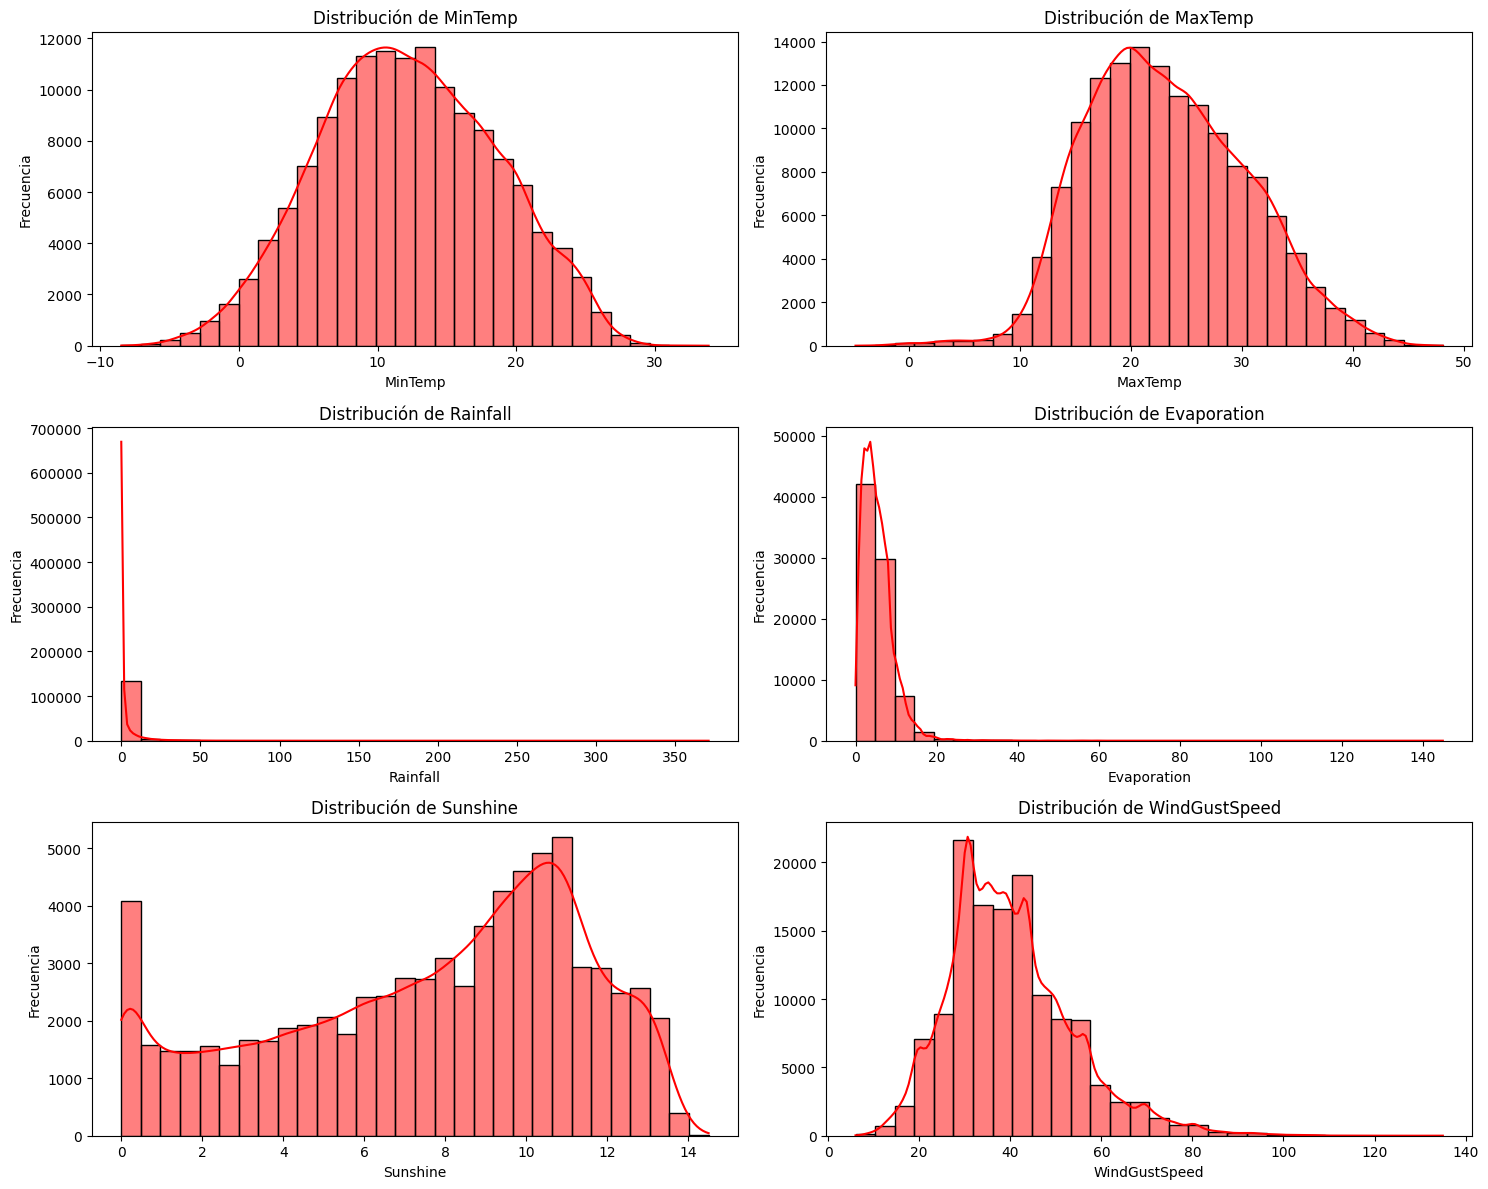

In [9]:
# Seleccionando solo columnas numéricas para los gráficos de distribución
num_cols = temperature_df.select_dtypes(include=['float64']).columns

# Configurando el tamaño de la figura para los gráficos
plt.figure(figsize=(15, 12))

# Generando gráficos de distribución (histogramas) para las primeras 6 características numéricas
for i, col in enumerate(num_cols[:6]):
    plt.subplot(3, 2, i+1)
    sns.histplot(temperature_df[col], kde=True, bins=30, color='red')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

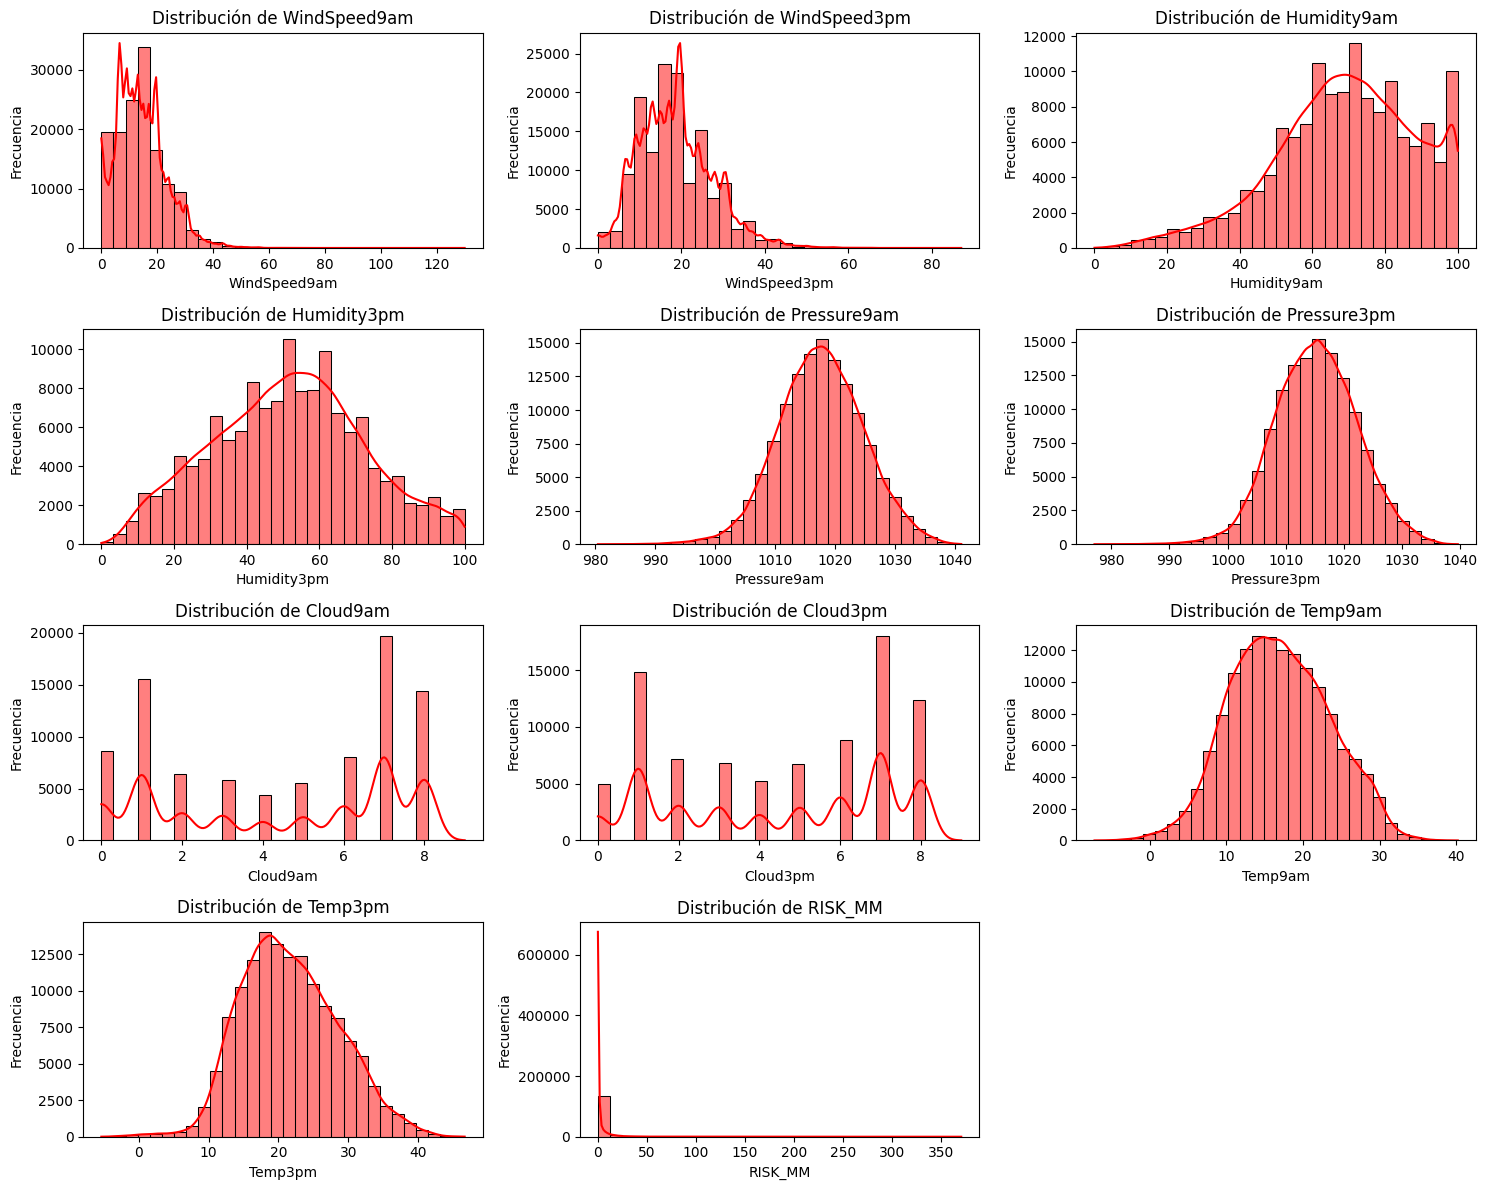

In [10]:
# Configurando el tamaño de la figura para los gráficos
plt.figure(figsize=(15, 12))

# Número de columnas a graficar
num_columns = len(num_cols[6:])

# Calculando el número de filas necesarias para el layout (ajustar según sea necesario)
n_rows = (num_columns + 2) // 3

# Generando gráficos para las características numéricas restantes
for i, col in enumerate(num_cols[6:]):
    if col in ['Year', 'Month', 'Day', 'Hour']:
        continue
    plt.subplot(n_rows, 3, i+1)  # Ajustando el layout para acomodar las gráficas
    sns.histplot(temperature_df[col], kde=True, bins=30, color='red')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

##### B. Distribución de datos mensuales de acuerdo a cada año

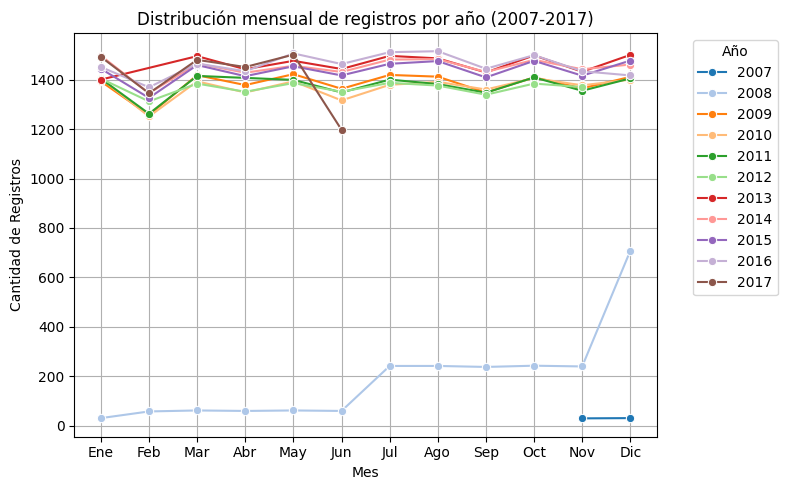

In [11]:
temp_for_date = temperature_df.copy()

# Convirtiendo la columna 'Date' a un tipo de datos de fecha
temp_for_date['Date'] = pd.to_datetime(temp_for_date['Date'])
# Creando nuevas columnas 'DateYear' y 'DateMonth'
temp_for_date['DateYear'] = temp_for_date['Date'].dt.year
temp_for_date['DateMonth'] = temp_for_date['Date'].dt.month
# Agrupando los datos por 'DateYear' y 'DateMonth'
grouped_df = temp_for_date.groupby(['DateYear', 'DateMonth']).size().reset_index(name='Counts')
# Nombres de los meses para las etiquetas del eje X
month_names = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
# Creando el gráfico
plt.figure(figsize=(8, 5))
lineplot = sns.lineplot(data=grouped_df, x='DateMonth', y='Counts', hue='DateYear', palette='tab20', marker='o')
# Configurando el gráfico
plt.title('Distribución mensual de registros por año (2007-2017)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Registros')
plt.xticks(ticks=range(1, 13), labels=month_names)  # Etiquetas de meses
# Ajustando la leyenda para incluir todos los años
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

##### C. Distribución de registros por ciudad

/tmp/ipykernel_7722/600513922.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(column_counts.index, rotation=90)


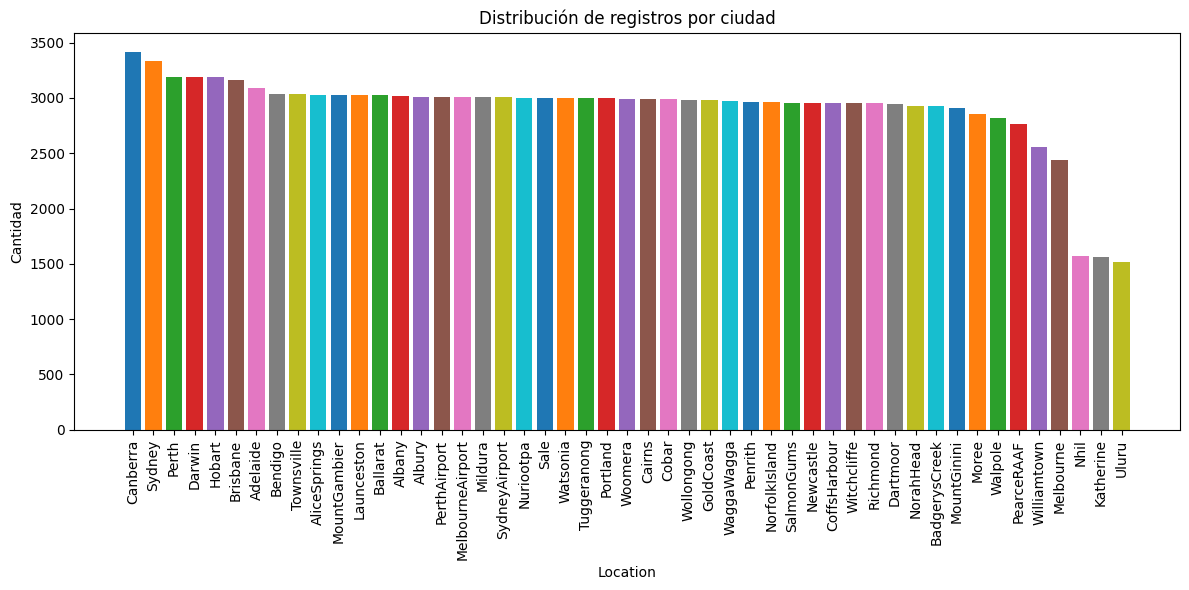

In [12]:
# Contar los valores de la columna
column_counts = temperature_df["Location"].value_counts()
# Crear una paleta de colores personalizada basada en la cantidad de valores
color_palette = sns.color_palette()
# Crear una figura y un subplot con el tamaño personalizado
fig, axs = plt.subplots(figsize=(12, 6))
# Gráfico de barras para la columna con colores personalizados
axs.bar(column_counts.index, column_counts.values, color=color_palette)
# Configurar las etiquetas del eje x con rotación opcional
axs.set_xticklabels(column_counts.index, rotation=90)
axs.set_title(f'Distribución de registros por ciudad')
axs.set_xlabel("Location")
axs.set_ylabel('Cantidad')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

##### D. Distribución de predicción de lluvias

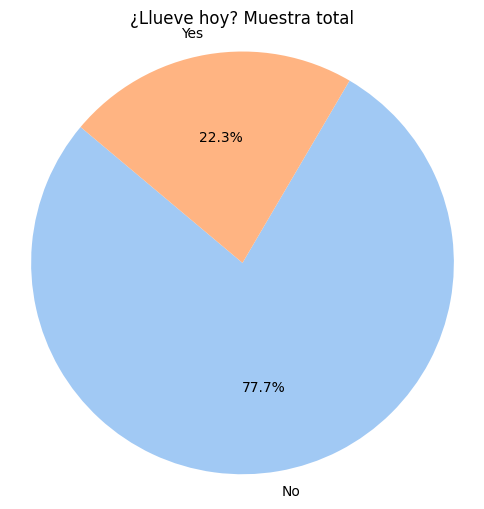

In [13]:
# Distribución de la columna 'RainToday'
class_counts = temperature_df['RainToday'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')  # Hace que el gráfico sea circular
plt.title('¿Llueve hoy? Muestra total')
plt.show()

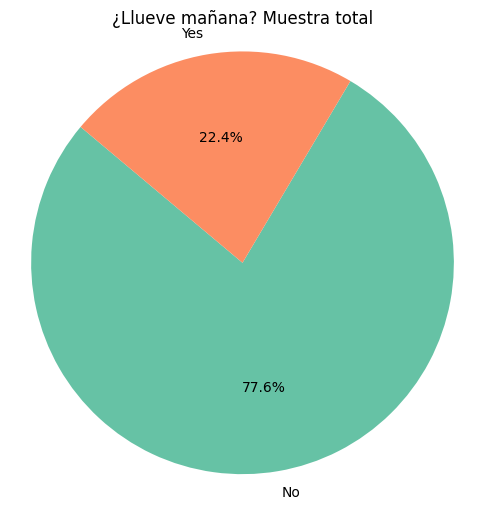

In [14]:
# Distribución de la columna 'RainTomorrow'
class_counts = temperature_df['RainTomorrow'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.axis('equal')  # Hace que el gráfico sea circular
plt.title('¿Llueve mañana? Muestra total')
plt.show()

#### 2.2.3. Análisis de outliers

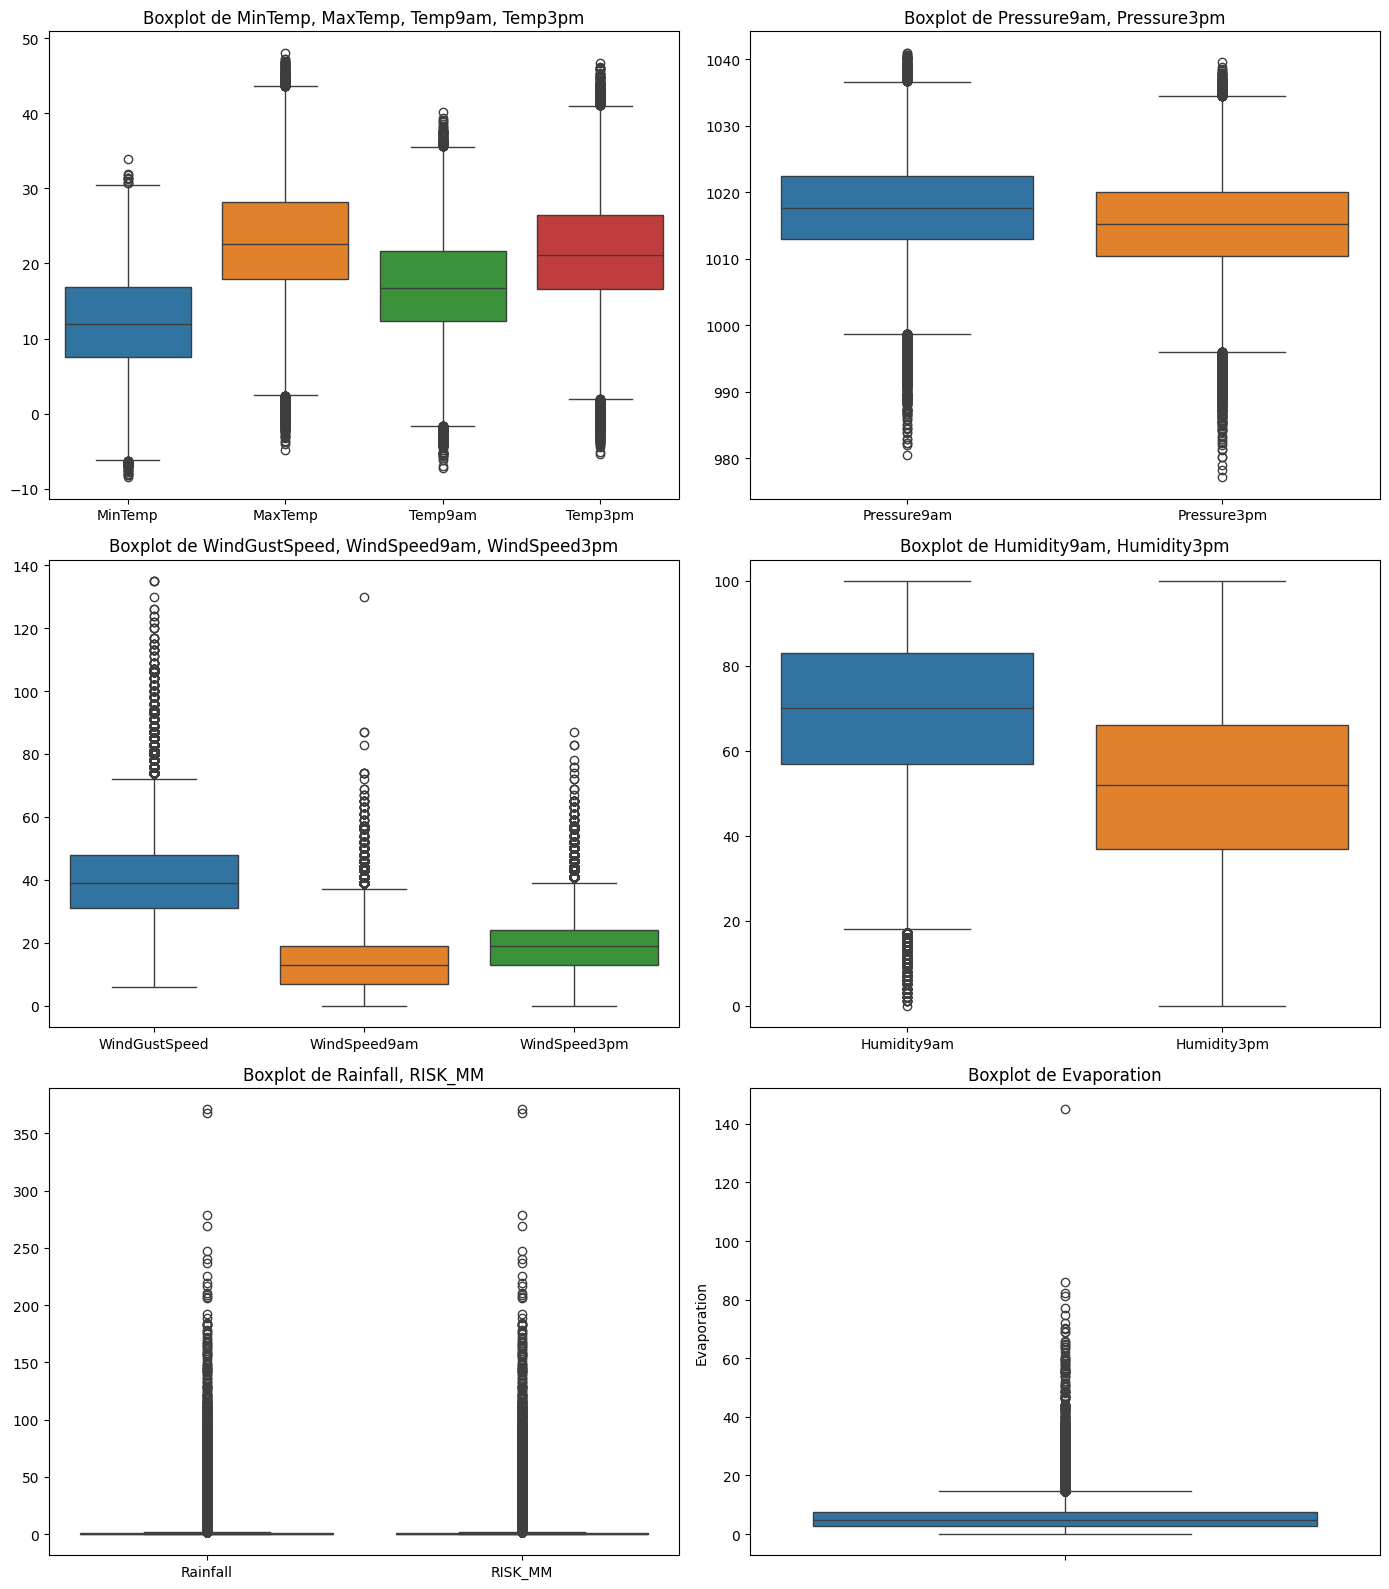

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(14, 16))
sns.boxplot(data=temperature_df[["MinTemp", "MaxTemp", "Temp9am", "Temp3pm"]], ax=axs[0, 0])
axs[0, 0].set_title("Boxplot de MinTemp, MaxTemp, Temp9am, Temp3pm")
sns.boxplot(data=temperature_df[["Pressure9am", "Pressure3pm"]], ax=axs[0, 1])
axs[0, 1].set_title("Boxplot de Pressure9am, Pressure3pm")
sns.boxplot(data=temperature_df[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]], ax=axs[1, 0])
axs[1, 0].set_title("Boxplot de WindGustSpeed, WindSpeed9am, WindSpeed3pm")
sns.boxplot(data=temperature_df[["Humidity9am", "Humidity3pm"]], ax=axs[1, 1])
axs[1, 1].set_title("Boxplot de Humidity9am, Humidity3pm")
sns.boxplot(data=temperature_df[["Rainfall", "RISK_MM"]], ax=axs[2, 0])
axs[2, 0].set_title("Boxplot de Rainfall, RISK_MM")
sns.boxplot(data=temperature_df["Evaporation"], ax=axs[2, 1])
axs[2, 1].set_title("Boxplot de Evaporation")
plt.tight_layout()
plt.show()

In [21]:
columns = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'WindSpeed9am',
        'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Rainfall', 'RISK_MM', 'Evaporation']
for column in columns:
    media = temperature_df[column].mean()
    desviacion_estandar = temperature_df[column].std()
    temperature_df['Z_Score'] = (temperature_df[column] - media) / desviacion_estandar
    limite_inferior = round(media - 3 * desviacion_estandar, 1)
    limite_superior = round(media + 3 * desviacion_estandar, 1)
    outliers = temperature_df[(temperature_df['Z_Score'] > 3) | (temperature_df['Z_Score'] < -3)]
    num_outliers = outliers.shape[0]
    print("=========================================")
    print("Outliers Humidity9am:", num_outliers)
    print("Límite inferior:", limite_inferior)
    print("Límite superior:", limite_superior)

Outliers Humidity9am: 19
Límite inferior: -7.0
Límite superior: 31.4
Outliers Humidity9am: 309
Límite inferior: 1.9
Límite superior: 44.6
Outliers Humidity9am: 138
Límite inferior: -2.5
Límite superior: 36.5
Outliers Humidity9am: 370
Límite inferior: 0.9
Límite superior: 42.5
Outliers Humidity9am: 499
Límite inferior: 996.3
Límite superior: 1039.0
Outliers Humidity9am: 421
Límite inferior: 994.1
Límite superior: 1036.4
Outliers Humidity9am: 1331
Límite inferior: -0.8
Límite superior: 80.8
Outliers Humidity9am: 1309
Límite inferior: -12.7
Límite superior: 40.7
Outliers Humidity9am: 934
Límite inferior: -7.8
Límite superior: 45.0
Outliers Humidity9am: 471
Límite inferior: 11.7
Límite superior: 126.0
Outliers Humidity9am: 0
Límite inferior: -10.9
Límite superior: 113.9
Outliers Humidity9am: 2409
Límite inferior: -23.0
Límite superior: 27.7
Outliers Humidity9am: 2456
Límite inferior: -23.1
Límite superior: 27.8
Outliers Humidity9am: 856
Límite inferior: -7.1
Límite superior: 18.0


## 3. **DATA PREPARATION**

La preparación de datos comprenderá tres fases:
* Eliminación de columnas que no sean objeto de relevancia para este estudio
* Aplicación de técnicas de encoding para variables categóricas
* Finalmente, el tratamiento de valores nulos

In [9]:
# Hacemos una replica de nuestro dataset para hacer las transformaciones
temp_df_transformed = temperature_df.copy()

### 3.1. **Eliminar columnas**

A continuación, vamos a seleccionar las columnas que no serán considerados para el modelado de datos. 

In [10]:
# Antes que todo, vamos a convertir la fecha a formato Date para luego extraer el año y el mes
temp_df_transformed['Date'] = pd.to_datetime(temp_df_transformed['Date'])
temp_df_transformed['DateYear'] = temp_df_transformed['Date'].dt.year
temp_df_transformed['DateMonth'] = temp_df_transformed['Date'].dt.month

Se ha decidido prescindir de los siguientes valores:
* Las columna **Date**, ya que se trabajará con el mes y el año en columnas separadas.
* Las columnas numéricas **WindGustDir**, **WindDir9am**, **WindDir3pm**, **Sunshine** y **Rainfall** por el bajo nivel de correlación (inferior al 50%) que presentan con las demás variables.
* La columna categórica **RainToday**, ya que no será utilizada en nuestro análisis.
* La columna **Z_Score** por tratase de una columna creada de manera temporal.

In [12]:
columns_to_remove = ['Date','WindGustDir','WindDir9am','WindDir3pm', 'Sunshine','Rainfall','RainToday']
temp_df_transformed.drop(columns=columns_to_remove, inplace=True)

In [13]:
temp_df_transformed.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Evaporation      60843
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
RainTomorrow         0
DateYear             0
DateMonth            0
dtype: int64

### 3.2. **Tratamiento de valores nulos**

Los valores nulos serán completados con distintas técnicas de imputación. No se hará, por tanto, eliminación de datos, ya que al haber un universo grande de números, es posible llenar los datos faltantes con muestras representativas, según el caso.

Se aplicarán tres técnicas de imputación:

* Se imputarán con el **promedio** las columnas **MinTemp** y **MaxTemp**, ya que son columnas que muestran una distribución normal, es decir, la gran mayoría de datos se conentran al medio de una tabla de distribución, donde el promedio no afectará la distribución, desbalanceando los datos.
* Se imputarán con la **mediana** las columnas **WindGustSpeed**, **WindSpeed9am**, **WindSpeed3pm**, **Humidity9am**, **Humidity3pm**, ya que al contrario del caso anterior, esta columnas cuentan con una distribución más bien inclinada a alguno de los dos lados de la muestra, por lo que para evitar alterar la mencionada distribución se hace necesario recurrir a una técnica como la mediana.
* Se imputarán con **KNN** las columnas **Temp9am**, **Temp3pm** y **Evaporation**, ya que su distribución tiene una alta concentración de datos en pocos intervalos, por lo que el uso de las técnicas anteriores podría aumentar esa concentración. Es necesario un enfoque diferente, y aquí es donde KNN toma relevancia. Con KNN, los datos son imputados a partir de los datos "vecinos", manteniendo así la integridad en la distribución y logrando así una muestra más representaiva. ¿Por qué no aplicarla para todos los casos? Porque se trata de una técnica de machine learning que tiene un alto costo de recursos computacionales, de manera que es preferible reservarla en los casos que se crea más necesarios a fin de optimizar los recursos.

In [14]:
temp_df_transformed.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Evaporation      60843
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
RainTomorrow         0
DateYear             0
DateMonth            0
dtype: int64

In [15]:
temp_df_imputed = temp_df_transformed.copy()

In [16]:
# Definimos las columnas al cual aplicarles el promedio
mean_columns = ['MinTemp', 'MaxTemp']
# Imputamos el promedio a las columnas seleccionadas
for column in temp_df_imputed:
    if column in mean_columns:
        mean = temp_df_imputed[column].mean()
        temp_df_imputed[column] = temp_df_imputed[column].fillna(mean)

In [17]:
# Definimos las columnas al cual aplicarles la mediana
median_columns = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']
# Imputamos la mediana a las columnas seleccionadas
for column in temp_df_imputed:
    if column in median_columns:
        median = temp_df_imputed[column].median()
        temp_df_imputed[column] = temp_df_imputed[column].fillna(median)

In [18]:
# Definimos las columnas al cual aplicarles la moda
mode_columns = ['Temp9am', 'Temp3pm', 'Evaporation']

# Imputamos la moda a las columnas seleccionadas
for column in temp_df_imputed:
    if column in mode_columns:
        mode = temp_df_imputed[column].mode()[0]
        temp_df_imputed[column] = temp_df_imputed[column].fillna(mode)

In [19]:
knn_columns = ['Cloud9am', 'Cloud3pm']

scaler = StandardScaler()
temp_df_imputed[knn_columns] = scaler.fit_transform(temp_df_imputed[knn_columns])
imputer = KNNImputer(n_neighbors=5)
temp_df_imputed[knn_columns] = imputer.fit_transform(temp_df_imputed[knn_columns])
temp_df_imputed[knn_columns] = scaler.inverse_transform(temp_df_imputed[knn_columns])

In [20]:
temp_df_imputed.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Evaporation      0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
RainTomorrow     0
DateYear         0
DateMonth        0
dtype: int64

### 3.3. **Encoding**

Para la aplicación de técnicas de encoding para nuestras variables categóricas, utilizaremos principalmente Label Encoder, el cual transformará nuestra categoría en un número que permitirá utilizarlo en nuestros modelamientos.

Sin embargo, utilizaremos One-Hot Encoding para la columna Location, ya que esta columna, por su naturaleza nominal, no son ordenables entre sí. Al asignarles un valor numérico, los modelos de entrenamiento podrían jerarquizar dichas categorías por su número, lo que constituiría un error. En este caso, cada una de las categorías se convertirán en columnas adicionales que contendrán valores booleanos: cuando sea true, significa que corresponde a la respectiva categoría Location.

In [100]:
# Aplicar One-Hot Encoding a la columna 'Location' con nombres de columnas personalizados
location_encoded = pd.get_dummies(temp_df_imputed['Location'], prefix='')
# Concatenar las nuevas columnas al DataFrame original
temp_df_encoded = pd.concat([temp_df_imputed, location_encoded], axis=1)

In [101]:
# Crear una instancia del Label Encoder
encoder = LabelEncoder()
# Transformar las columnas categóricas
for column in temp_df_encoded.columns:
    if temp_df_encoded[column].dtype == 'object':
        temp_df_encoded[column] = encoder.fit_transform(temp_df_encoded[column])

In [102]:
temp_df_encoded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 68 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Location           142193 non-null  int64  
 1   MinTemp            142193 non-null  float64
 2   MaxTemp            142193 non-null  float64
 3   Evaporation        142193 non-null  float64
 4   WindGustSpeed      142193 non-null  float64
 5   WindSpeed9am       142193 non-null  float64
 6   WindSpeed3pm       142193 non-null  float64
 7   Humidity9am        142193 non-null  float64
 8   Humidity3pm        142193 non-null  float64
 9   Pressure9am        142193 non-null  float64
 10  Pressure3pm        142193 non-null  float64
 11  Cloud9am           142193 non-null  float64
 12  Cloud3pm           142193 non-null  float64
 13  Temp9am            142193 non-null  float64
 14  Temp3pm            142193 non-null  float64
 15  RISK_MM            142193 non-null  float64
 16  Ra

### 3.4. **Definiendo estacionalidad**

Para nuestro análisis hemos decidido hacer un análisis estacionalizado, para lo cual hemos escogido tomar como muestra los datos de invierno, los cuales corresponden a los meses de julio, agosto y septiembre. Lo anterior debido a que el invierno es el mes más lluvioso del año, por lo que para una mejor comprensión de los denómenos lluviosos es mejor concentrarse en estos momentos del año.

In [106]:
# Filtramos datos de los meses de invierno
temp_df_filtered = temp_df_encoded[temp_df_encoded['DateMonth'].isin([7, 8, 9])]

### 3.5. **Selección de ciudad**

Asimismo, se ha decidido hacer un análisis por ciudad, por lo que se ha tomado como objetivo de análisis la ciudad de Canberra. Esto por dos motivos: En primer lugar, por ser la capital de Australia; pero, además, por ser la ciudad con la mayor densidad de datos de nuestro dataset, lo que nos permite un análisis más certero sobre sus condiciones climáticas.

In [105]:
# Filtramos datos de la ciudad de Canberra
temp_df_filtered = temp_df_encoded[temp_df_encoded['_Canberra'] == 1]

### 3.4. **Escalamiento**

Para un mejor modelado es altamente recomendado que a los datos se les aplique alguna técnica de escalamiento, ya que con esto prevenimos sesgos en el modelamiento por asimetrías en la escalas de las características. Con estas técnicas podemos tener no solo un modelo más preciso y con menos sesgos, sino que también logran un mejor procesamiento.

Se ha optado por utilizar el escalador Standard Scaler, ya que nuestro dataset maneja columnas con distribuciones más bien normales, permitiendo así mantener balanceada esta distribución para evitar un desajuste en su estructura y escala.

In [87]:
temp_df_scaled = temp_df_filtered.copy()

In [88]:
scaled_columns = temp_df_scaled.columns[temp_df_scaled.columns != 'RainTomorrow']
scaler = StandardScaler()
temp_df_scaled[scaled_columns] = scaler.fit_transform(temp_df_scaled[scaled_columns])

In [89]:
temp_df_scaled.head()

,Location,MinTemp,MaxTemp,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,_Townsville,_Tuggeranong,_Uluru,_WaggaWagga,_Walpole,_Watsonia,_Williamtown,_Witchcliffe,_Wollongong,_Woomera
44594,0.0,0.977244,-0.843764,0.171764,2.661449,2.127273,1.305389,-0.250100,0.291069,-1.194132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44595,0.0,1.303225,-0.447907,-0.431381,1.456078,1.923484,0.979174,-1.007598,0.109408,-1.005849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44596,0.0,-0.752966,-0.900314,-0.431381,-0.671048,-0.521975,-0.108210,0.369670,0.109408,0.446621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44597,0.0,-1.129098,-0.758937,-1.185312,-0.387432,-0.827658,-0.869379,0.231943,0.048855,1.280447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44598,0.0,-0.376833,-0.136877,-1.486884,-1.947324,0.089390,-2.065501,0.300807,0.230516,1.603218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
temp_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 44594 to 47502
Data columns (total 68 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           823 non-null    float64
 1   MinTemp            823 non-null    float64
 2   MaxTemp            823 non-null    float64
 3   Evaporation        823 non-null    float64
 4   WindGustSpeed      823 non-null    float64
 5   WindSpeed9am       823 non-null    float64
 6   WindSpeed3pm       823 non-null    float64
 7   Humidity9am        823 non-null    float64
 8   Humidity3pm        823 non-null    float64
 9   Pressure9am        823 non-null    float64
 10  Pressure3pm        823 non-null    float64
 11  Cloud9am           823 non-null    float64
 12  Cloud3pm           823 non-null    float64
 13  Temp9am            823 non-null    float64
 14  Temp3pm            823 non-null    float64
 15  RISK_MM            823 non-null    float64
 16  RainTomorrow       823 no

#### 3.5. **Tratamiento de outliers**

Se ha decidido no hacer tratamiento de outliers, ya que los valores atípicos en el campo de la meteorología son relevantes y necesarios de incorporar para una mejor comprensión del fenómeno del clima y adquirir nuevos conocimientos hasta ahora incompletos. Un outlier puede significar un día de extremo calor, o de extremo frío, o de un gran temporal, los cuales son significativos de estudiar.

#### 3.6. **Análisis de correlacion**

In [108]:
# Vamos ahora a trazar un nuevo mapa de calor con todos los valores imputados
# Solamente vamos a considerar las columnas que no comiencen con '_'
to_remove = ['_Adelaide', '_Albany', '_Albury',
 '_AliceSprings', '_BadgerysCreek', '_Ballarat', '_Bendigo', '_Brisbane',
 '_Cairns', '_Canberra', '_Cobar', '_CoffsHarbour', '_Dartmoor', '_Darwin',
 '_GoldCoast', '_Hobart', '_Katherine', '_Launceston', '_Melbourne',
 '_MelbourneAirport', '_Mildura', '_Moree', '_MountGambier', '_MountGinini',
 '_Newcastle', '_Nhil', '_NorahHead', '_NorfolkIsland', '_Nuriootpa',
 '_PearceRAAF', '_Penrith', '_Perth', '_PerthAirport', '_Portland', '_Richmond',
 '_Sale', '_SalmonGums', '_Sydney', '_SydneyAirport', '_Townsville',
 '_Tuggeranong', '_Uluru', '_WaggaWagga', '_Walpole', '_Watsonia',
 '_Williamtown', '_Witchcliffe', '_Wollongong', '_Woomera']
temp_df_related = temp_df_scaled.copy()
temp_df_related.drop(columns=to_remove, inplace=True)

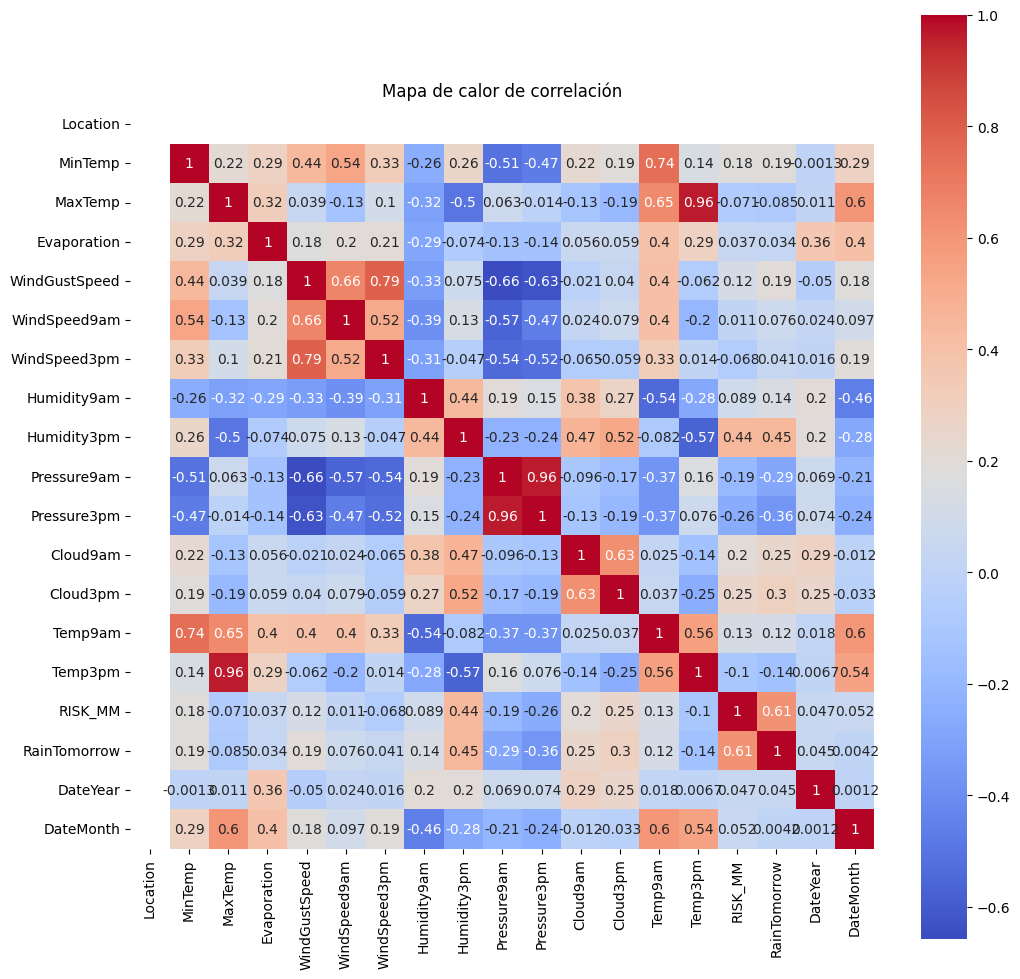

In [109]:
dfco = temp_df_related.select_dtypes(include='number')
corr = dfco.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Mapa de calor de correlación")
plt.show()

In [110]:
# Vamos a listar las relaciones entre las variables, ordenadas desde la más fuerte a la más débil
list = dfco.corr().unstack().sort_values(ascending=False).drop_duplicates()
pd.set_option('display.max_rows', None)
print(list)

MinTemp        MinTemp          1.000000
MaxTemp        Temp3pm          0.964794
Pressure3pm    Pressure9am      0.964145
WindSpeed3pm   WindGustSpeed    0.787310
Temp9am        MinTemp          0.742262
WindSpeed9am   WindGustSpeed    0.663543
Temp9am        MaxTemp          0.646242
Cloud9am       Cloud3pm         0.630016
RISK_MM        RainTomorrow     0.612328
MaxTemp        DateMonth        0.601169
Temp9am        DateMonth        0.597525
Temp3pm        Temp9am          0.557630
               DateMonth        0.541511
WindSpeed9am   MinTemp          0.539935
Cloud3pm       Humidity3pm      0.521821
WindSpeed9am   WindSpeed3pm     0.519586
Humidity3pm    Cloud9am         0.468082
               RainTomorrow     0.453490
WindGustSpeed  MinTemp          0.441295
Humidity9am    Humidity3pm      0.440175
RISK_MM        Humidity3pm      0.437688
Evaporation    DateMonth        0.402270
Temp9am        WindSpeed9am     0.402163
               WindGustSpeed    0.401981
               E

**Conclusión:** Las correlaciones más significativas (por encima del 50%) que hemos identificado son:

**1)** La relación entre la temperatura a las 3 pm (***Temp3pm***) y la temperatura máxima del día (***MaxTemp***), con un **98.46%**.

**2)** La relación entre la presión atmosférica a las 9 am (***Pressure9am***) y la presión atmosférica a las 3 pm (***Pressure3pm***), con un **96.13%**.

**3)** La relación entre la temperatura a las 9 am (***Temp9am***) y la temperatura mínima del día (***MinTemp***), con un **90.18%**.

**4)** La relación entre la temperatura máxima del día (***MaxTemp***) y la temperatura a las 9 am (***Temp9am***), con un **88.70%**.

**5)** La relación entre la temperatura a las 9 am (***Temp9am***) y la temperatura a las 3 pm (***Temp3pm***), con un **86.06%**.

**6)** La relación entre la temperatura mínima del día (***MinTemp***) y la temperatura máxima del día (***MaxTemp***), con un **73.63%**.

**7)** La relación entre la temperatura mínima del día (***MinTemp***) y la temperatura a las 3 pm (***Temp3pm***), con un **70.89%**.

**8)** La relación entre la velocidad de las ráfagas de viento más fuertes del día (***WindGustSpeed***) y la velocidad del viento a las 3 pm (***WindSpeed3pm***), con un **68.64%**.

**9)** La relación entre la humedad relativa a las 3 pm (***Humidity3pm***) y la humedad relativa a las 9 am (***Humidity9am***), con un **66.74%**.

**10)** La relación entre la velocidad de las ráfagas de viento más fuertes del día (***WindGustSpeed***) y la velocidad del viento a las 9 am (***WindSpeed9am***), con un **60.48%**.

**11)** La relación entre la nubosidad a las 9 am (***Cloud9am***) y la nubosidad a las 3 pm (***Cloud3pm***), con un **60.41%**.

**12)** La relación entre la evaporación (***Evaporation***) y la temperatura máxima del día (***MaxTemp***), con un **58.89%**.

**13)** La relación entre la evaporación (***Evaporation***) y la temperatura a las 3 pm (***Temp3pm***), con un **57.43%**.

**14)** La relación entre la temperatura a las 9 am (***Temp9am***) y la evaporación (***Evaporation***), con un **54.55%**.

**15)** La relación entre la nubosidad a las 3 pm (***Cloud3pm***) y la humedad relativa a las 3 pm (***Humidity3pm***), con un **52.33%**.

**16)** La relación entre la velocidad del viento a las 9 am (***WindSpeed9am***) y la velocidad del viento a las 3 pm (***WindSpeed3pm***), con un **51.99%**.

**17)** La relación entre la humedad relativa a las 3 pm (***Humidity3pm***) y la nubosidad a las 9 am (***Cloud9am***), con un **51.70%**.

**18)** La relación etre la predicción de lluvia para mañana (***RainTomorrow***) y la cantidad de lluvia registrada en milímetros durante el día siguiente al de la observación (***RISK_MM***), con un **50,15%**.

Veamos graficamente algunas de estas relaciones:

In [94]:
def generate_jointplot(df, x_col, y_col, hue_col, xlim=None, ylim=None):
    grid = sns.jointplot(data=df, x=x_col, y=y_col, hue=hue_col,
                         palette="seismic", s=15, xlim=xlim, ylim=ylim)
    grid.fig.set_figwidth(11)
    grid.fig.set_figheight(4)
    grid.set_axis_labels(x_col, y_col)
    title = f"Relación entre {x_col} y {y_col} por clase '{hue_col}'"
    grid.fig.suptitle(title, y=1.03)
    plt.show()

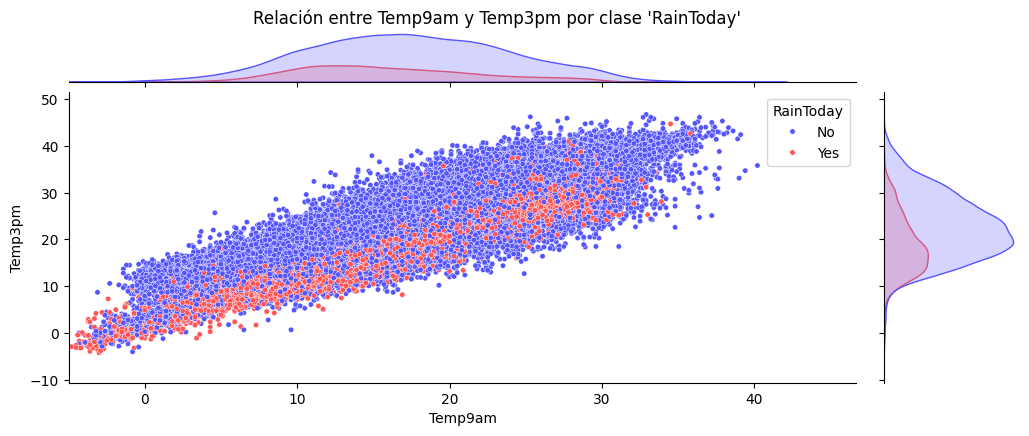

In [95]:
generate_jointplot(temperature_df, "Temp9am", "Temp3pm", "RainToday", xlim=(-5, max(temperature_df["Temp3pm"])))

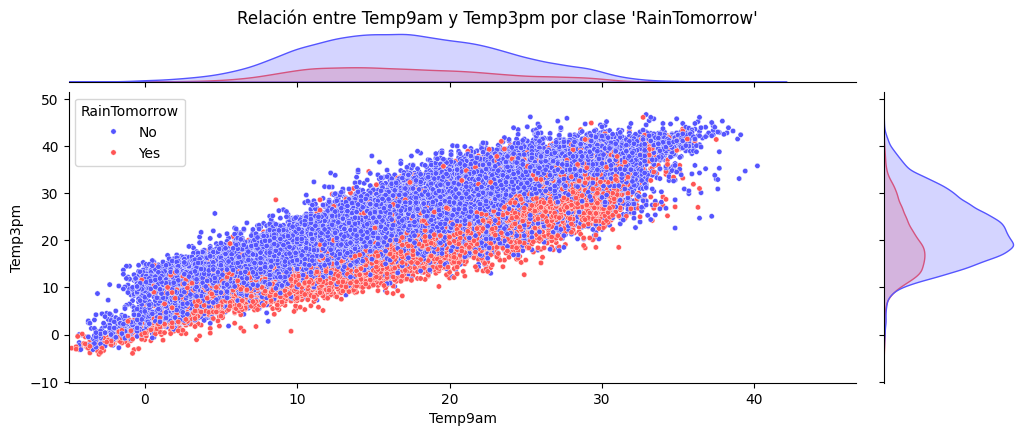

In [111]:
# generate jointplot where 0 is 'No' and 1 is 'Yes'
generate_jointplot(temperature_df, "Temp9am", "Temp3pm", "RainTomorrow", xlim=(-5, max(temperature_df["Temp3pm"])))

## 4. **MODELING**

Llegados a este punto nos toca realizar, con los datos ya preparados, el modelado de datos. Este apartado abarcará dos grandes grupos de modelados: los de análisis supervisado y los de análisis no supervisados.

#### **Caso a analizar:** 
De acuerdo a lo señalado en los apartados anteriores, se ha definido que se analizará **los datos del clima de la ciudad de Canberra durante los meses de invierno** (julio, agosto y septiembre).

### 4.1. **Análisis Supervisado**

Los modelos de análisis supervisados se agrupan en dos categorías:
* Los modelos de **regresión**, los cuales tienen por objeto predecir un valor numérico continuo basado en variables de entrada. 
* Los modelos de **clasificación**, los cuales tienen por objeto asignar una etiqueta o categoría a un conjunto de datos de entrada.

#### 4.1.1. **Regresión**

Para echar a andar nuestros modelos de regresión necesitaremos previamente nuestro **target**, es decir, el valor con el cual haremos predicciones. En este caso nuestro target será la columna **Temp9am**, ya que teniendo conocimiento de la temperatura de la mañana se podrá informar a sus ciudadanos a fin que puedan tomar precauciones antes de salir de sus hogares.

In [96]:
columns_regression = ['Location', 'MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                      'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'Cloud9am', 'Cloud3pm', 'Evaporation', 
                      'RainTomorrow', 'DateYear', 'DateMonth', 'RISK_MM', '_Adelaide', '_Albany', '_Albury',
 '_AliceSprings', '_BadgerysCreek', '_Ballarat', '_Bendigo', '_Brisbane',
 '_Cairns', '_Canberra', '_Cobar', '_CoffsHarbour', '_Dartmoor', '_Darwin',
 '_GoldCoast', '_Hobart', '_Katherine', '_Launceston', '_Melbourne',
 '_MelbourneAirport', '_Mildura', '_Moree', '_MountGambier', '_MountGinini',
 '_Newcastle', '_Nhil', '_NorahHead', '_NorfolkIsland', '_Nuriootpa',
 '_PearceRAAF', '_Penrith', '_Perth', '_PerthAirport', '_Portland', '_Richmond',
 '_Sale', '_SalmonGums', '_Sydney', '_SydneyAirport', '_Townsville',
 '_Tuggeranong', '_Uluru', '_WaggaWagga', '_Walpole', '_Watsonia',
 '_Williamtown', '_Witchcliffe', '_Wollongong', '_Woomera']

temp_df_regression = temp_df_scaled[columns_regression]

X = temp_df_regression # Estas serán nuestras variables de entrada
y = temp_df_scaled['Temp9am']  # Este será nuestro target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29, shuffle=True)

##### 4.1.1.1. **Regresión Múltiple**

Con el modelo de regresión múltiple se establece una relación lineal entre las variables de entrada (X) y el target fijado (y), ajustando así una línea o un hiperplano que atenúe la suma de los errores cuadrados y pueda así predecir mi target (y) a partir de los datos de entrada (X). Dicho de otra forma, podemos predecir un valor numérico continuo utilizando múltiples variables independientes, permitiendo analizar el efecto de cada variable sobre la variable dependiente mientras se controlan otras variables

In [97]:
# Crear y entrenar el modelo de regresión lineal múltiple
linear_reg_mult = LinearRegression()
linear_reg_mult.fit(X_train, y_train)

# Predecir y evaluar
y_pred_mult = linear_reg_mult.predict(X_test)
mse_mult = mean_squared_error(y_test, y_pred_mult)
r2_mult = r2_score(y_test, y_pred_mult)

print(f"Error cuadratico medio (MSE - Regresión Múltiple): {mse_mult}")
print(f"R al cuadrado (R² - Regresión Múltiple): {r2_mult}")

Error cuadratico medio (MSE - Regresión Múltiple): 0.10313699912670073
R al cuadrado (R² - Regresión Múltiple): 0.902513725103599


Como es posible apreciar, el modelo de Regresión Múltiple muestra un error cuadrático medio alto junto a un R² con un 100% de precisión. Esto es un síntoma de sobreajuste del modelo, toda vez que tiene una precisión perfecta (del 100%) al trabajar con los datos ya enrenados, pero que yerra considerablemente al trabajar con datos nuevos.

##### 4.1.1.2. **Lasso**

Con el modelo Lasso podemos realizar regresión y selección de características simultáneamente, ya que incluye una penalización L1 que tiende a reducir algunos coeficientes a cero, eliminando así variables irrelevantes y mejorando la interpretabilidad del modelo.

In [98]:
# Crear y entrenar el modelo LASSO
lasso_reg = Lasso(alpha=0.1)  # El valor de alpha puede ajustarse según sea necesario
lasso_reg.fit(X_train, y_train)

# Predecir y evaluar
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Error cuadratico medio (MSE - LASSO): {mse_lasso}")
print(f"R al cuadrado (R² - LASSO): {r2_lasso}")

Error cuadratico medio (MSE - LASSO): 0.15348208637058874
R al cuadrado (R² - LASSO): 0.8549269710163322


En el caso de Lasso, a diferencia del caso anterior, el MSE resulta muy bajo pero a su vez con una precisión (R²) muy buena, de un 99%, lo que habla de un modelo mucho mejor ajustado y con una más que buena capacidad de predicción.

##### 4.1.1.3. **Árbol de Decisión**

Con el modelo Decision Tree Regressor podemos predecir un valor numérico continuo utilizando una estructura de árbol de decisiones, que divide el espacio de características en regiones homogéneas basadas en los valores de las variables independientes, proporcionando una interpretación clara y visual del proceso de predicción.

In [112]:
# Crear y entrenar el modelo DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predecir y evaluar
y_pred = regressor.predict(X_test)
mse_tree_reg = mean_squared_error(y_test, y_pred)
r2_tree_reg = r2_score(y_test, y_pred)

print(f"Error cuadratico medio (MSE - ARBOL DE REGRESIÓN): {mse_tree_reg}")
print(f"R al cuadrado (R² - ARBOL DE REGRESIÓN): {r2_tree_reg}")

Error cuadratico medio (MSE - ARBOL DE REGRESIÓN): 0.28179093092358853
R al cuadrado (R² - ARBOL DE REGRESIÓN): 0.7336479790188319


El Árbol de Regresión muestra un mejor rendimiento aún, al disminuir su índice de error y mejorar a su vez su precisión. De los tres modelos de regresión probados, muestra tener el mejor rendimiento.

#### 4.1.2. **Clasificación**

Para echar a andar nuestros modelos de clasificación necesitaremos previamente nuestro **target**, es decir, el valor con el cual haremos predicciones. En este caso nuestro target será la columna **RainTomorrow**, mediante el cual predecimos si mañana llueve o no.

In [114]:
columns_classification = ['DateYear', 'DateMonth','MinTemp', 'MaxTemp',
 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
 'Pressure9am', 'Pressure3pm', 'Temp9am','Temp3pm', 'Cloud9am', 'Cloud3pm', 'Evaporation', '_Adelaide', '_Albany', '_Albury',
 '_AliceSprings', '_BadgerysCreek', '_Ballarat', '_Bendigo', '_Brisbane',
 '_Cairns', '_Canberra', '_Cobar', '_CoffsHarbour', '_Dartmoor', '_Darwin',
 '_GoldCoast', '_Hobart', '_Katherine', '_Launceston', '_Melbourne',
 '_MelbourneAirport', '_Mildura', '_Moree', '_MountGambier', '_MountGinini',
 '_Newcastle', '_Nhil', '_NorahHead', '_NorfolkIsland', '_Nuriootpa',
 '_PearceRAAF', '_Penrith', '_Perth', '_PerthAirport', '_Portland', '_Richmond',
 '_Sale', '_SalmonGums', '_Sydney', '_SydneyAirport', '_Townsville',
 '_Tuggeranong', '_Uluru', '_WaggaWagga', '_Walpole', '_Watsonia',
 '_Williamtown', '_Witchcliffe', '_Wollongong', '_Woomera']

temp_df_classification = temp_df_scaled[columns_classification]

# Separar las características (W) y nuestro target (z)
W = temp_df_classification
z = temp_df_scaled['RainTomorrow']

# Dividir el conjunto de datos en entrenamiento y prueba
W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.2, random_state=29)

##### 4.1.2.1. **Árbol de clasificación**

Con el modelo Decision Tree Classifier podemos clasificar observaciones en categorías discretas utilizando una estructura de árbol de decisiones, que divide el espacio de características en nodos basados en los valores de las variables independientes, proporcionando una interpretación clara y visual del proceso de clasificación.

In [115]:
model_tr = DecisionTreeClassifier(max_features=5,random_state=29)
model_tr.fit(W_train, z_train)

cl_y_pred = model_tr.predict(W_test)

# Evaluar el rendimiento del modelo
accuracy_tr = accuracy_score(z_test, cl_y_pred)
confusion_tr = confusion_matrix(z_test, cl_y_pred)
cross_val_tr = GridSearchCV(model_tr, param_grid={'max_depth':np.arange(1,10)}, cv=5, n_jobs=-1)
cross_val_tr.fit(W_train, z_train)
report_tr = classification_report(z_test, cl_y_pred)
report_tr_dict = classification_report(z_test, cl_y_pred, output_dict=True)


# Extraer precisión, recall y puntaje F1 promedio
precision_tr = report_tr_dict['weighted avg']['precision']
recall_tr = report_tr_dict['weighted avg']['recall']
f1score_tr = report_tr_dict['weighted avg']['f1-score']

# Imprimir resultados
print("Precisión:", accuracy_tr)
print("\nMatriz de confusión:")
print(confusion_tr)
print("\nValidacion cruzada:")
print(f"Best Score: {cross_val_tr.best_score_}")
print(f"Best Params: {cross_val_tr.best_params_}")
print("\nInforme de clasificación:")
print(report_tr)

Precisión: 0.7818181818181819

Matriz de confusión:
[[112  19]
 [ 17  17]]

Validacion cruzada:
Best Score: 0.8312745778394633
Best Params: {'max_depth': 7}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       131
           1       0.47      0.50      0.49        34

    accuracy                           0.78       165
   macro avg       0.67      0.68      0.67       165
weighted avg       0.79      0.78      0.78       165



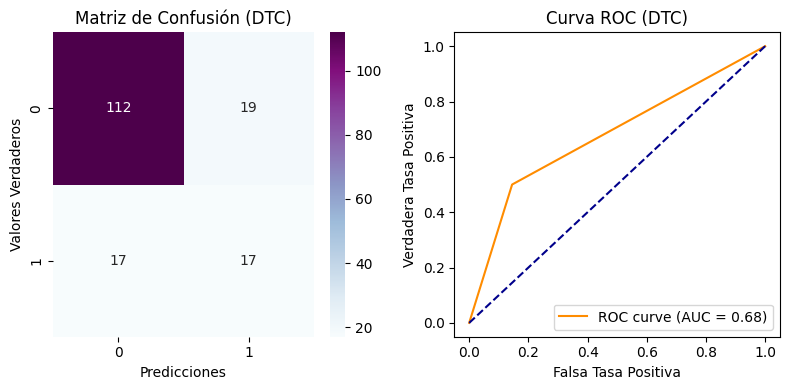

In [116]:
# Crear un gráfico con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Gráfico de la Matriz de Confusión
sns.heatmap(confusion_tr, annot=True, fmt='d', cmap='BuPu', ax=ax1)
ax1.set_xlabel('Predicciones')
ax1.set_ylabel('Valores Verdaderos')
ax1.set_title('Matriz de Confusión (DTC)')

# Calcular la curva ROC y el área bajo la curva
fpr, tpr, thresholds = roc_curve(z_test, model_tr.predict_proba(W_test)[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc_tr = roc_auc

# Gráfico de la Curva ROC
ax2.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax2.set_xlabel('Falsa Tasa Positiva')
ax2.set_ylabel('Verdadera Tasa Positiva')
ax2.set_title('Curva ROC (DTC)')
ax2.legend(loc="lower right")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

Un rendimiento del 96% presentó el Árbol de Decisión, lo que manifiesta un buen nivel de aprendizaje de los datos por parte del modelo.

##### 4.1.2.2. **KNN Classifier**

Con el modelo K Neighbors Classifier podemos clasificar observaciones en categorías discretas basándonos en la proximidad de una observación a sus 'k' vecinos más cercanos en el espacio de características, permitiendo decisiones de clasificación que reflejan las similitudes locales en los datos.

In [125]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(W_train, z_train)

# Realizar predicciones en el conjunto de prueba
knn_y_pred = model_knn.predict(W_test)

# Evaluar el rendimiento del modelo
accuracy_nb = accuracy_score(z_test, knn_y_pred)
confusion_nb = confusion_matrix(z_test, knn_y_pred)
cross_val_nb = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors':np.arange(1,10)}, cv=5)
cross_val_nb.fit(W_train, z_train)
report_nb = classification_report(z_test, knn_y_pred)
report_nb_dict = classification_report(z_test, knn_y_pred, output_dict=True)

# Extraer precisión, recall y puntaje F1 promedio
precision_nb = report_nb_dict['weighted avg']['precision']
recall_nb = report_nb_dict['weighted avg']['recall']
f1score_nb = report_nb_dict['weighted avg']['f1-score']


# Imprimir resultados
print("Precisión:", accuracy_nb)
print("\nMatriz de confusión:")
print(confusion_nb)
print("\nValidacion cruzada:")
print(f"Best Score: {cross_val_nb.best_score_}")
print(f"Best Params: {cross_val_nb.best_params_}")
print("\nInforme de clasificación:")
print(report_nb)

Precisión: 0.8484848484848485

Matriz de confusión:
[[129   2]
 [ 23  11]]

Validacion cruzada:
Best Score: 0.843442054129077
Best Params: {'n_neighbors': 7}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       131
           1       0.85      0.32      0.47        34

    accuracy                           0.85       165
   macro avg       0.85      0.65      0.69       165
weighted avg       0.85      0.85      0.82       165



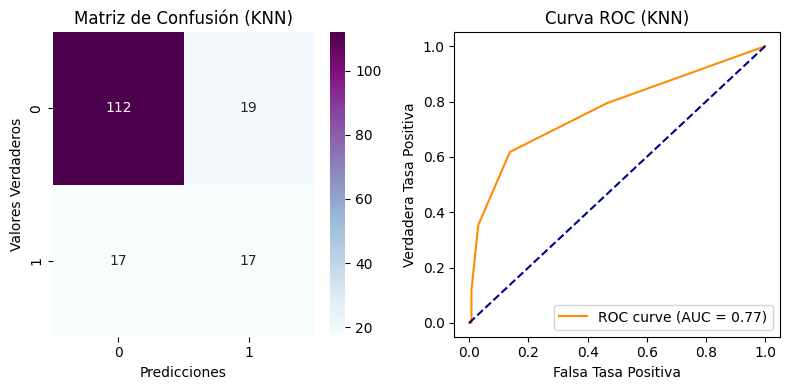

In [118]:
# Crear un gráfico con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Gráfico de la Matriz de Confusión
sns.heatmap(confusion_tr, annot=True, fmt='d', cmap='BuPu', ax=ax1)
ax1.set_xlabel('Predicciones')
ax1.set_ylabel('Valores Verdaderos')
ax1.set_title('Matriz de Confusión (KNN)')

# Calcular la curva ROC y el área bajo la curva
fpr, tpr, thresholds = roc_curve(z_test, model_knn.predict_proba(W_test)[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc_tr = roc_auc

# Gráfico de la Curva ROC
ax2.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax2.set_xlabel('Falsa Tasa Positiva')
ax2.set_ylabel('Verdadera Tasa Positiva')
ax2.set_title('Curva ROC (KNN)')
ax2.legend(loc="lower right")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

Con una precisión del 93%, KNN mostró un buen rendimiento, quizás no mejor que el Decision Tree, pero con una alta precisión que nos indica un buen nivel de aprendizaje.

##### 4.1.2.3. **Random Forest Classifier**

Con el modelo Random Forest Classifier podemos clasificar observaciones en categorías discretas utilizando un conjunto de árboles de decisión, donde cada árbol se entrena con una muestra aleatoria del conjunto de datos y las predicciones finales se obtienen mediante un proceso de votación, mejorando la precisión y reduciendo el sobreajuste.

In [127]:
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=29, max_depth=9)
model_random_forest.fit(W_train, z_train)

# Realizar predicciones en el conjunto de prueba
rf_y_pred = model_random_forest.predict(W_test)

# Evaluar el rendimiento del modelo
accuracy_rf = accuracy_score(z_test, rf_y_pred)
confusion_rf = confusion_matrix(z_test, rf_y_pred)
cross_val_rf = GridSearchCV(RandomForestClassifier(), param_grid={'max_depth':np.arange(1,10)}, cv=5, n_jobs=-1)
cross_val_rf.fit(W_train, z_train)
report_rf = classification_report(z_test, rf_y_pred)
report_rf_dict = classification_report(z_test, rf_y_pred, output_dict=True)

# Extraer precisión, recall y puntaje F1 promedio
precision_rf = report_rf_dict['weighted avg']['precision']
recall_rf = report_rf_dict['weighted avg']['recall']
f1score_rf = report_rf_dict['weighted avg']['f1-score']

# Imprimir resultados
print("Precisión:", accuracy_rf)
print("\nMatriz de confusión:")
print(confusion_rf)
print("\nValidacion cruzada:")
print(f"Best Score: {cross_val_rf.best_score_}")
print(f"Best Params: {cross_val_rf.best_params_}")
print("\nInforme de clasificación:")
print(report_rf)

Precisión: 0.8545454545454545

Matriz de confusión:
[[127   4]
 [ 20  14]]

Validacion cruzada:
Best Score: 0.8601549849641452
Best Params: {'max_depth': 9}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       131
           1       0.78      0.41      0.54        34

    accuracy                           0.85       165
   macro avg       0.82      0.69      0.73       165
weighted avg       0.85      0.85      0.84       165



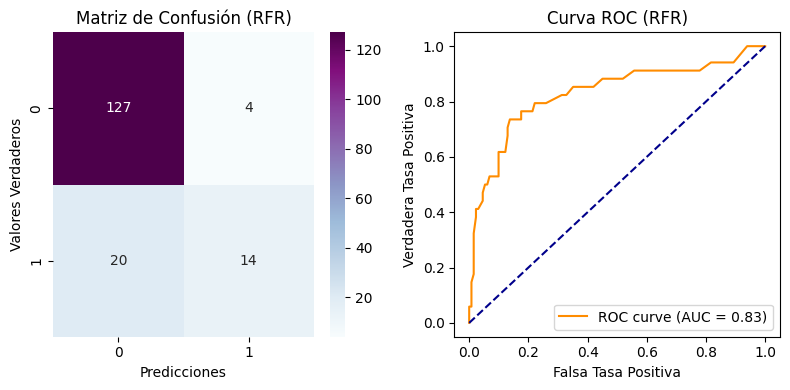

In [120]:
# Crear un gráfico con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Gráfico de la Matriz de Confusión
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='BuPu', ax=ax1)
ax1.set_xlabel('Predicciones')
ax1.set_ylabel('Valores Verdaderos')
ax1.set_title('Matriz de Confusión (RFR)')

# Calcular la curva ROC y el área bajo la curva
fpr, tpr, thresholds = roc_curve(z_test, model_random_forest.predict_proba(W_test)[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc_rf = roc_auc

# Gráfico de la Curva ROC
ax2.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax2.set_xlabel('Falsa Tasa Positiva')
ax2.set_ylabel('Verdadera Tasa Positiva')
ax2.set_title('Curva ROC (RFR)')
ax2.legend(loc="lower right")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

Este modelo presenta un nivel de precisión de un 100%, lo cual nos permite advertir la existencia de un episodio de sobreajuste de nuestro modelo de Regresión Logística.

##### 4.1.2.4. **SGD Classifier**

Con el modelo SGD Classifier podemos clasificar observaciones en categorías discretas utilizando el método de descenso de gradiente estocástico para entrenar modelos lineales de clasificación de manera eficiente en grandes conjuntos de datos, adaptándose bien a problemas de clasificación binaria y multiclase.

In [130]:
model_sgd = SGDClassifier(random_state=29, max_iter=1)
model_sgd.fit(W_train, z_train)

# Realizar predicciones en el conjunto de prueba
sgd_y_pred = model_sgd.predict(W_test)

# Evaluar el rendimiento del modelo
accuracy_sgd = accuracy_score(z_test, sgd_y_pred)
confusion_sgd = confusion_matrix(z_test, sgd_y_pred)
cross_val_sgd = GridSearchCV(SGDClassifier(), param_grid={'max_iter':np.arange(1,10)}, cv=5, n_jobs=-1)
cross_val_sgd.fit(W_train, z_train)
report_sgd = classification_report(z_test, sgd_y_pred)
report_sgd_dict = classification_report(z_test, sgd_y_pred, output_dict=True)

# Extraer precisión, recall y puntaje F1 promedio
precision_sgd = report_sgd_dict['weighted avg']['precision']
recall_sgd = report_sgd_dict['weighted avg']['recall']
f1score_sgd = report_sgd_dict['weighted avg']['f1-score']

# Imprimir resultados
print("Precisión:", accuracy_sgd)
print("\nMatriz de confusión:")
print(confusion_sgd)
print("\nValidacion cruzada:")
print(f"Best Score: {cross_val_sgd.best_score_}")
print(f"Best Params: {cross_val_sgd.best_params_}")
print("\nInforme de clasificación:")
print(report_sgd)

/home/cristobal/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cristobal/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cristobal/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cristobal/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cristobal/.local/l

Precisión: 0.8303030303030303

Matriz de confusión:
[[125   6]
 [ 22  12]]

Validacion cruzada:
Best Score: 0.8130811936155448
Best Params: {'max_iter': 9}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       131
           1       0.67      0.35      0.46        34

    accuracy                           0.83       165
   macro avg       0.76      0.65      0.68       165
weighted avg       0.81      0.83      0.81       165



/home/cristobal/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cristobal/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cristobal/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cristobal/.local/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/cristobal/.local/l

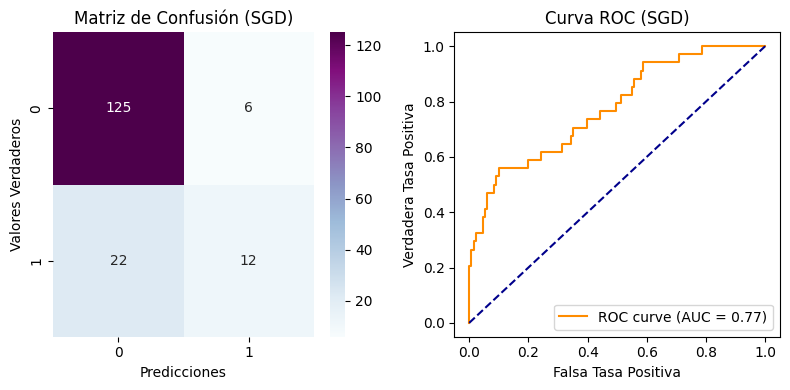

In [131]:
# Crear un gráfico con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Gráfico de la Matriz de Confusión
sns.heatmap(confusion_sgd, annot=True, fmt='d', cmap='BuPu', ax=ax1)
ax1.set_xlabel('Predicciones')
ax1.set_ylabel('Valores Verdaderos')
ax1.set_title('Matriz de Confusión (SGD)')

# Calcular la curva ROC y el área bajo la curva
fpr, tpr, thresholds = roc_curve(z_test, model_sgd.decision_function(W_test))
roc_auc = auc(fpr, tpr)
roc_auc_sgd = roc_auc

# Gráfico de la Curva ROC
ax2.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
ax2.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
ax2.set_xlabel('Falsa Tasa Positiva')
ax2.set_ylabel('Verdadera Tasa Positiva')
ax2.set_title('Curva ROC (SGD)')
ax2.legend(loc="lower right")

# Mostrar ambos gráficos
plt.tight_layout()
plt.show()

Al igual como ocurrió con Random Forest, el modelo SGD muestra una precisión del 100%, lo que nos advierte la existencia de un problema de sobreajuste del modelo.

### 4.2. **Análisis No Supervisado**

Los modelos supervisados suponen la existencia de un target (y), de manera que mi valor de salida se determina a partir de mis valores de entrada. Pero ¿qué sucede si no tenemos target? Es aquí donde el análisis no supervisado cobra relevancia, ya que nos permite explorar y encontrar patrones o estructuras ocultas en los datos sin necesidad de etiquetas predefinidas, facilitando tareas como la agrupación (clustering), reducción de dimensionalidad y detección de anomalías.

#### 4.2.1. **Preparación Dataset**

In [132]:
# Creamos dataset para analisis no supervisado
columns_unsupervised = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm', 'Evaporation', 'RISK_MM']
temp_df_unsupervised = temp_df_scaled[columns_unsupervised]

In [133]:
# Separar las características del dataframe
X = temp_df_unsupervised.iloc[:, 1:].values

# Crear objeto PCA
pca = PCA(n_components=2) #Asignamos las Componentes que queremos

# Ajustar y transformar los datos
X_pca = pca.fit_transform(X)

# Obtener los componentes principales
components = pca.components_

# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Imprimir los resultados

print("Datos transformados por PCA:")
print(X_pca)
print("Componentes principales:")
print(components)
print("Varianza explicada:")
print(explained_variance)

Datos transformados por PCA:
[[ 2.98607177 -0.83551939]
 [ 2.58816736 -0.13999247]
 [-1.6812806   0.1660064 ]
 ...
 [ 0.49478086  0.53255877]
 [ 4.91972799 -2.98130131]
 [ 4.41037244 -3.86588182]]
Componentes principales:
[[ 0.13169855  0.41516303  0.35730596  0.37245983 -0.25929286  0.00745845
  -0.39856682 -0.38834007  0.34329417  0.07753679 -0.00268359  0.02949035
   0.19289043  0.07073118]
 [ 0.41617666 -0.08320005 -0.1130739  -0.01099555 -0.27006635 -0.44350839
   0.19060087  0.1802415   0.19631585  0.44026163 -0.28152645 -0.3178727
   0.12767236 -0.19886244]]
Varianza explicada:
[0.29605651 0.24778178]


#### 4.2.2. **Selección de caso de uso**

Vamos a elegir como caso de uso la medición de **la velocidad del viento según el nivel de la presión atmosférica** a las 9 de la mañana (am).

In [135]:
# Convert the list object into a DataFrame
unsupervised_df = pd.DataFrame(temp_df_unsupervised)

# Select the desired columns and sample the data
sample_size = 15000
data_selected = unsupervised_df.loc[:, ['WindSpeed9am', 'Pressure9am']].sample(n=min(sample_size, len(unsupervised_df)), random_state=42).values

# Create a new DataFrame with the selected data
df_selected = pd.DataFrame(data_selected)
X = df_selected

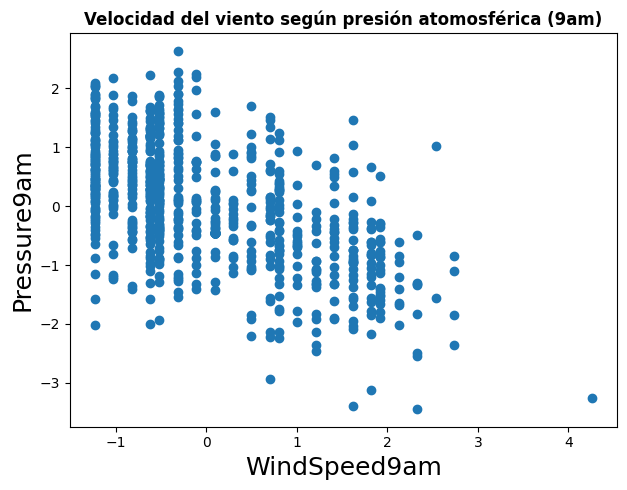

In [136]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_selected[0], df_selected[1])
plt.xlabel("WindSpeed9am", fontsize=18)
plt.ylabel("Pressure9am", fontsize=18)
plt.title("Velocidad del viento según presión atomosférica (9am)", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

#### 4.2.3. **Aplicación de técnicas de análisis no supervisado**

Vamos a hacer aplicación de dos técnicas muy populares de análisis no supervidado:
* KMEANS
* DBSCAN

##### 4.2.3.1. **KMEANS**

Con el modelo KMEANS podemos agrupar observaciones en un número predefinido de clústeres, asignando cada observación al clúster con el centroide más cercano, facilitando la identificación de grupos homogéneos dentro de los datos.

In [137]:
# Creamos nuestro modelo KMEANS para 10 clusters
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(X)
cluster = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
cluster.fit_predict(data_selected)
np.unique(cluster.labels_)
label = cluster.fit_predict(data_selected)

Para comenzar, haremos una agrupación con un número predefinido de clústeres. Este número se denomina K, el cual nos permite especificar cuántos grupos deseamos encontrar en los datos, de manera que el algoritmo pueda asignar cada observación al clúster cuyo centroide está más cercano, facilitando así la segmentación de los datos en K grupos homogéneos.

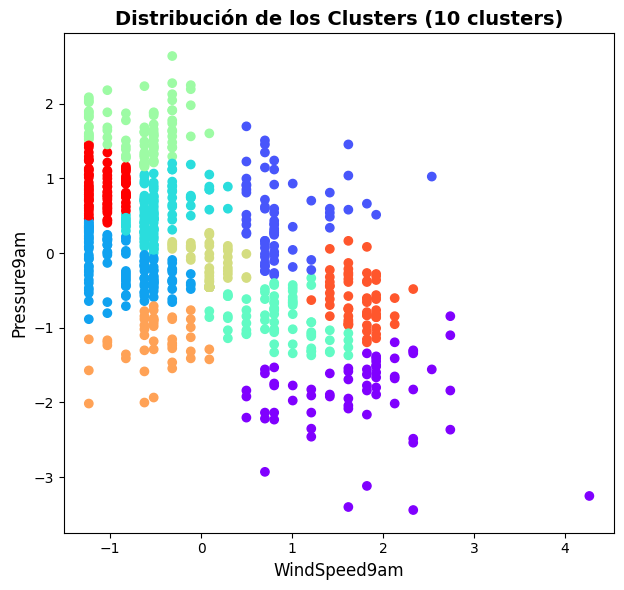


N° de muestras por clúster:
K1: 64 muestras
K2: 67 muestras
K3: 122 muestras
K4: 122 muestras
K5: 68 muestras
K6: 93 muestras
K7: 101 muestras
K8: 43 muestras
K9: 59 muestras
K10: 84 muestras


In [138]:
# Creamos el modelo de clustering jerárquico con 10 clusters
k_hierarchical_10 = 10
clustering_10 = AgglomerativeClustering(n_clusters=k_hierarchical_10)
labels_hierarchical_10 = clustering_10.fit_predict(X.values)

# Graficamos la distribución de los clusters comparativa
plt.figure(figsize=(12, 6))

# Generamos un gráfico que represente los 10 clusters
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_hierarchical_10, cmap='rainbow')
plt.xlabel("WindSpeed9am", fontsize=12)
plt.ylabel("Pressure9am", fontsize=12)
plt.title("Distribución de los Clusters (10 clusters)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

print("\nN° de muestras por clúster:")
for i in range(k_hierarchical_10):
    cluster_samples = X.loc[labels_hierarchical_10 == i]
    print(f'K{i+1}: {len(cluster_samples)} muestras')

###### 4.2.3.1.1. Técnica del Codo

Sin perjuicio de lo anterior, existen técnicas que nos permiten encontrar el K óptimo para nuestro modelo. En este caso usaremos la **técnica del codo** (KElbow), mediante el cual podemos identificar el número ideal de clústeres observando la variación de la suma de los errores cuadráticos dentro de los clústeres (inertia) a medida que aumentamos K, y seleccionando el punto donde la disminución de la inercia se vuelve menos pronunciada, formando un "codo" en el gráfico, lo que indica un equilibrio entre la complejidad del modelo y la calidad de la agrupación.

In [139]:
# Vamos a constuir el modelo
num_clusters = range(1, 40)
inertia = []

for n in num_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Técnica del codo')

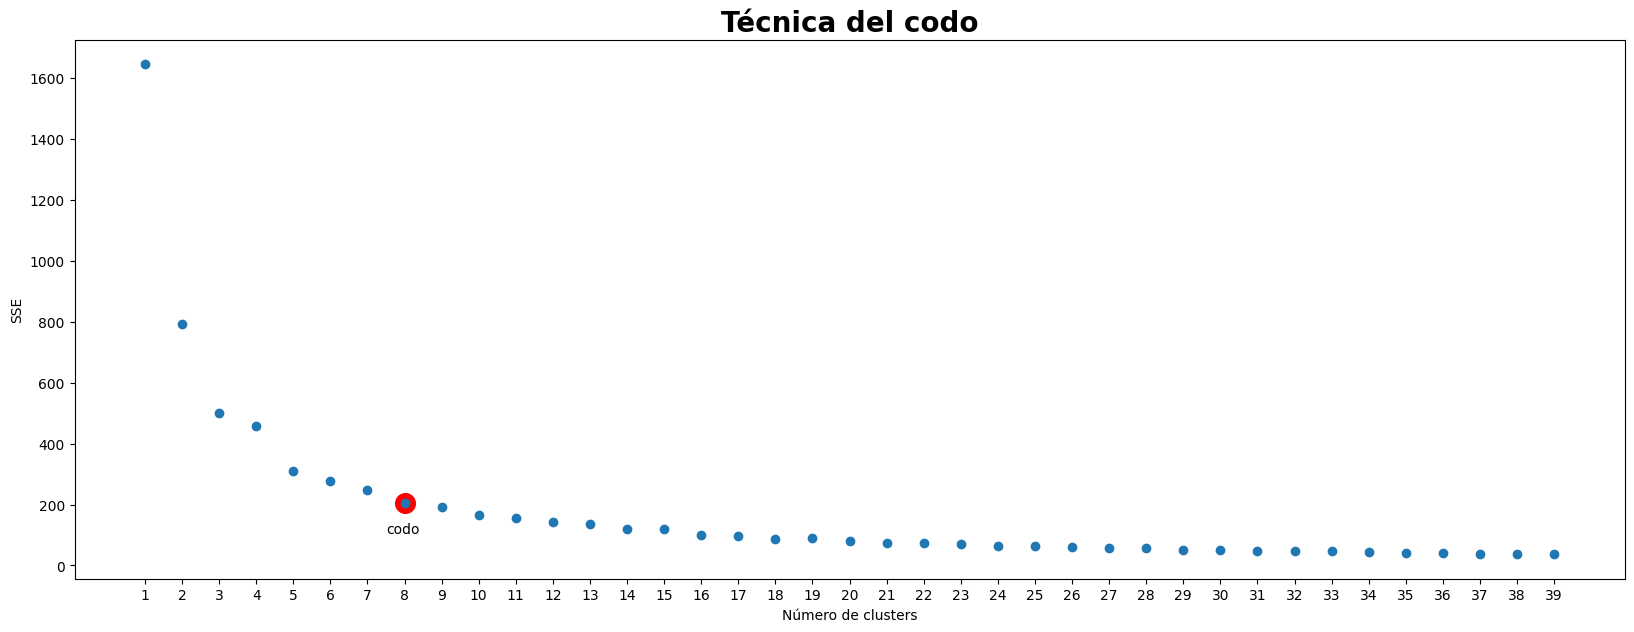

In [173]:
fig, ax = plt.subplots(figsize = (20, 7))

# esta dos lineas las agrego para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(8, inertia[7], color='red', s=200) # agregamos un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(7.5, inertia[7]-100, s="codo")       # agregamos un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SSEvsK
ax.scatter(range(1, 40), inertia)            
ax.set_xticks(range(1, 40))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")
# titulo
plt.title("Técnica del codo", fontsize=20, fontweight="bold")

In [174]:
kl = KneeLocator(range(1, 40), inertia, curve="convex", direction="decreasing")

print("El codo está en K =", kl.elbow)

El codo está en K = 8


In [175]:
# Creamos el modelo de clustering jerárquico con 8 clusters
k_hierarchical_8 = 8
clustering_8 = AgglomerativeClustering(n_clusters=k_hierarchical_8)
labels_hierarchical_8 = clustering_8.fit_predict(X.values)

In [176]:
print("\nN° de muestras por clúster:")
for i in range(k_hierarchical_8):
    cluster_samples = X.loc[labels_hierarchical_8 == i]
    print(f'K{i+1}: {len(cluster_samples)} muestras')


N° de muestras por clúster:
K1: 127 muestras
K2: 206 muestras
K3: 122 muestras
K4: 67 muestras
K5: 64 muestras
K6: 93 muestras
K7: 101 muestras
K8: 43 muestras


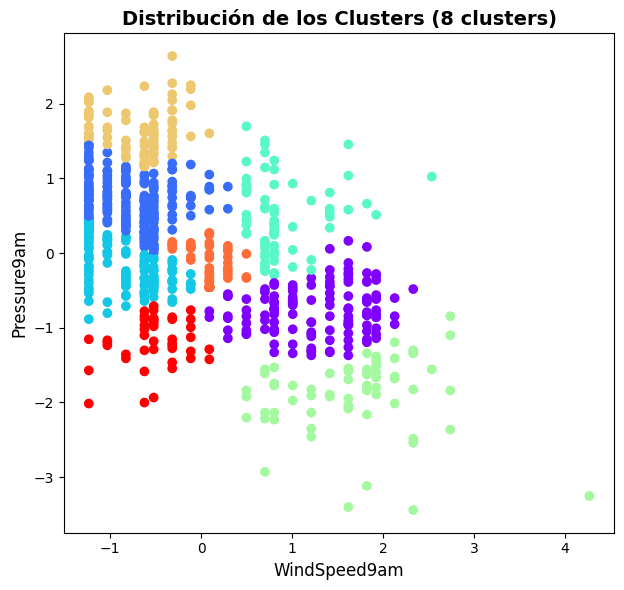

In [177]:
# Graficamos la distribución de los clusters comparativa
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_hierarchical_8, cmap='rainbow')
plt.xlabel("WindSpeed9am", fontsize=12)
plt.ylabel("Pressure9am", fontsize=12)
plt.title("Distribución de los Clusters (8 clusters)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

###### 4.2.3.1.2. Técnica del la Silueta

In [142]:
# Get the optimal number of clusters with Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

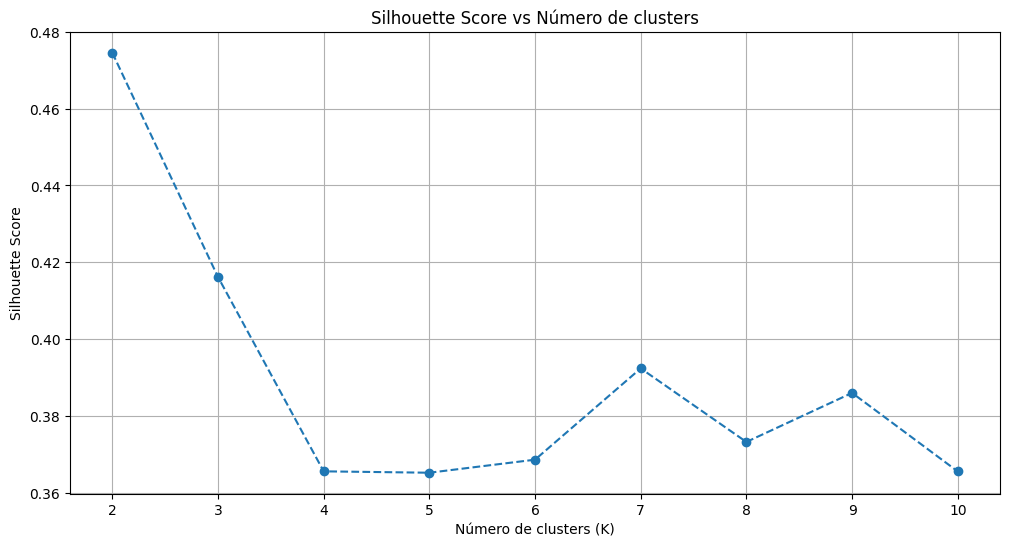

In [143]:
# Plot the Silhouette Score
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Número de clusters")
plt.grid(True)
plt.show()

In [144]:
# Imprimimos cada uno de los resultados
for i, score in enumerate(silhouette_scores):
    print(f"Número de clusters = {i+2}, Silhouette Score = {score}")

Número de clusters = 2, Silhouette Score = 0.47455452213482074
Número de clusters = 3, Silhouette Score = 0.41614918742984636
Número de clusters = 4, Silhouette Score = 0.3655241852255692
Número de clusters = 5, Silhouette Score = 0.36516305089521145
Número de clusters = 6, Silhouette Score = 0.36855959052487397
Número de clusters = 7, Silhouette Score = 0.3923356313106675
Número de clusters = 8, Silhouette Score = 0.37317833809811174
Número de clusters = 9, Silhouette Score = 0.3859505365518296
Número de clusters = 10, Silhouette Score = 0.365492735511692


In [145]:
# Determinamos el K optimo
best_cluster = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\nEl mejor número de clusters (K) es: {best_cluster}")


El mejor número de clusters (K) es: 2


In [178]:
# Creamos el modelo de clustering jerárquico con 2 clusters
k_hierarchical_2 = 2
clustering_2 = AgglomerativeClustering(n_clusters=k_hierarchical_2)
labels_hierarchical_2 = clustering_2.fit_predict(X.values)

In [179]:
print("\nN° de muestras por clúster:")
for i in range(k_hierarchical_2):
    cluster_samples = X.loc[labels_hierarchical_2 == i]
    print(f'K{i+1}: {len(cluster_samples)} muestras')


N° de muestras por clúster:
K1: 632 muestras
K2: 191 muestras


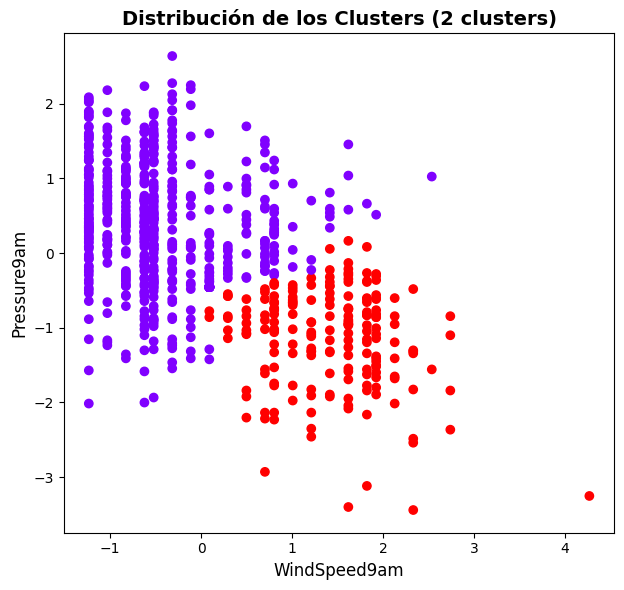

In [181]:
# Graficamos la distribución de los clusters comparativa
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_hierarchical_2, cmap='rainbow')
plt.xlabel("WindSpeed9am", fontsize=12)
plt.ylabel("Pressure9am", fontsize=12)
plt.title("Distribución de los Clusters (2 clusters)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

##### 4.2.3.2. **DBSCAN**

Con el modelo DBSCAN podemos identificar clústeres de densidad variable en los datos, agrupando observaciones basadas en la densidad de puntos en su vecindad y detectando automáticamente clústeres de forma arbitraria y puntos atípicos (outliers).

In [149]:
X2 = StandardScaler().fit_transform(X)

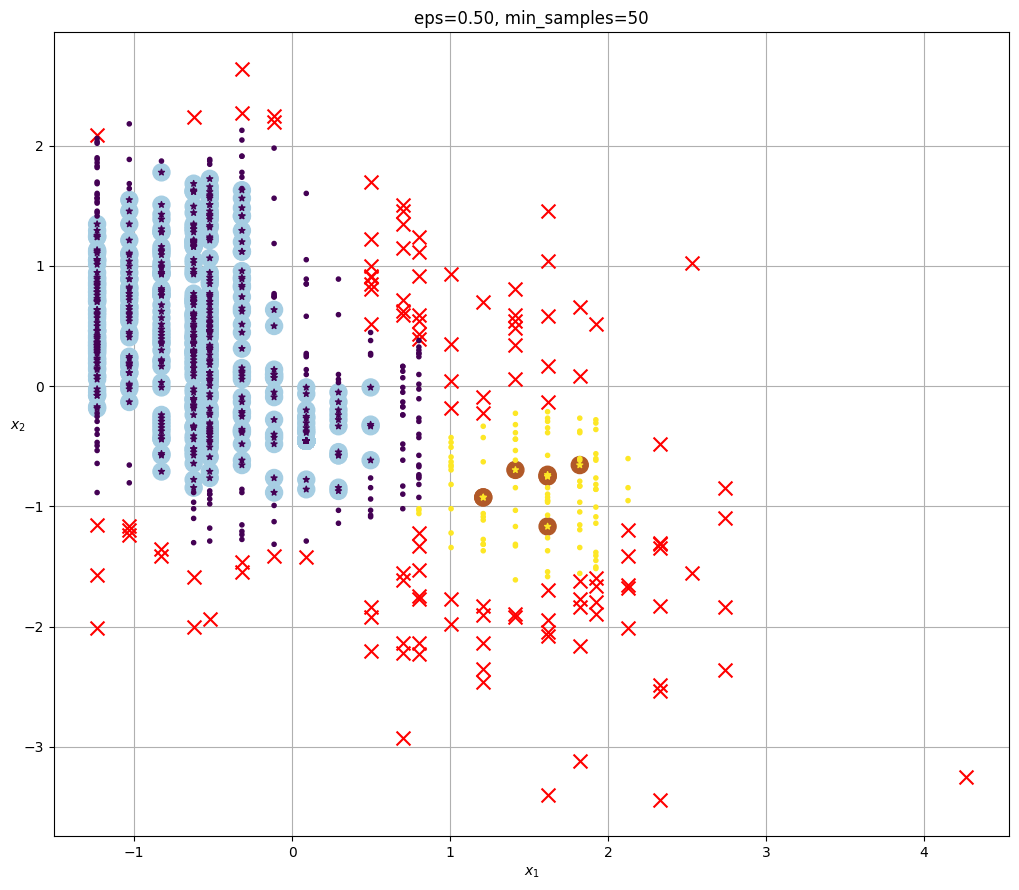

Número estimado de clusters: 2
Número de anomalías: 122


In [183]:
IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X2[anomalies_mask]
    non_cores = X2[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

# Entrenamos nuestro DBSCAN
db = DBSCAN(eps=0.5, min_samples=50).fit(X2)
db_labels = db.labels_
n_clusters_db_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)

# Generamos greficos
plt.figure(figsize=(20, 9))
plt.subplot(122)
plot_dbscan(db, X2, size=150)
save_fig("dbscan_plot")
plt.show()

print('Número estimado de clusters: %d' % n_clusters_db_)
print("Número de anomalías:", np.sum(db_labels == -1))

Es interesante notar que nuestro modelo pudo agrupar nuestros datos hasta en un estimado de 2 clústers, pero con un alto número de datos atípicos (outliers, 122). Esto muestra que cada modelo es mejor según la distribución de los datos, y más en concreto, según la densidad de los clústers. Como es posible apreciar, nuestros datos muestran tener clústers con una densidad más bien equitativa. KMEANS tiene un mejor rendimiento con este tipo de distribución de datos, mientras que a DBSCAN le cuesta más, ya que está diseñado para rendir mejor cuando estos clústers tienen densidades variables.

Para abordar este desafío, podemos complementar nuestra estrategia de agrupación utilizando ambos modelos y comparar sus resultados en distintos escenarios. Mientras KMEANS se destaca en identificar clústeres equitativamente densos al minimizar la varianza dentro de cada grupo, DBSCAN es más efectivo en detectar estructuras complejas y clústeres de formas arbitrarias, así como en identificar outliers con mayor precisión. Por lo tanto, una combinación de ambos enfoques puede proporcionarnos una visión más completa y matizada de nuestros datos. Al analizar los resultados de KMEANS, podemos establecer una línea base para la segmentación de datos bien distribuidos, y luego aplicar DBSCAN para descubrir patrones ocultos y datos atípicos que KMEANS podría pasar por alto, logrando así una comprensión más profunda y detallada de la estructura subyacente de nuestros datos.

## 5. **EVALUATION**

### 5.1. **Evaluación de modelos supervisados**

#### 5.1.1. Modelos de Regresión

In [164]:
# Generamos una tabla con resumen de resultados obtenidos
models_regression = [linear_reg_mult, lasso_reg, regressor]
results_regression = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R2'])
for model in models_regression:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results = pd.DataFrame({'Model': [model.__class__.__name__], 'MAE': [mae], 'MSE': [mse], 'R2': [r2]})
    results_regression = pd.concat([results_regression, model_results], ignore_index=True)

results_regression

/tmp/ipykernel_169593/312909367.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_regression = pd.concat([results_regression, model_results], ignore_index=True)


,Model,MAE,MSE,R2
0,LinearRegression,0.245353,0.103137,0.902514
1,Lasso,0.302222,0.153482,0.854927
2,DecisionTreeRegressor,0.385327,0.281791,0.733648


**Conclusión:** El mejor modelo de regresión es **Linear Regression**, ya que no solo tiene el mejor R² (precisión del 90%), sino que tiene la tasa de error más baja de los tres modelos testeados (Error Absoluto Medio de 24.54% y Error Cuadrático Medio del 10.31%), lo que significa que este modelo proporciona las predicciones más precisas y consistentes en comparación con los otros modelos evaluados.

#### 5.1.2. Modelos de Clasificación

In [152]:
# Generamos una tabla con resumen de resultados obtenidos
models_classification = [model_tr, model_knn, model_random_forest]
results_classification = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
for model in models_classification:
    z_pred = model.predict(W_test)
    accuracy = accuracy_score(z_test, z_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(z_test, z_pred, average='weighted')
    model_results = pd.DataFrame({'Model': [model.__class__.__name__], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1 Score': [f1_score]})
    results_classification = pd.concat([results_classification, model_results], ignore_index=True)

results_classification

/tmp/ipykernel_169593/797487877.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_classification = pd.concat([results_classification, model_results], ignore_index=True)


,Model,Accuracy,Precision,Recall,F1 Score
0,DecisionTreeClassifier,0.781818,0.786618,0.781818,0.784096
1,KNeighborsClassifier,0.848485,0.848163,0.848485,0.820257
2,RandomForestClassifier,0.854545,0.846190,0.854545,0.836354


**Conclusión:** El mejor modelo de clasificación ha resultado ser el **RandomForestClassifier**, porque ha obtenido la mayor precisión (85.45%), recall (85.45%) y F1 Score (83.64%) entre todos los modelos evaluados, lo que indica un excelente equilibrio entre la exactitud y la capacidad de identificar correctamente las clases positivas.


### 5.3. **Evaluación de modelos no supervisados**

In [182]:
print("\nModelo KMeans:")
print("Inertia:", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(X, kmeans.labels_))
print("\nModelo DBSCAN:")
print("Número estimado de clusters:", n_clusters_db_)
print("Número de anomalías:", np.sum(db_labels == -1))


Modelo KMeans:
Inertia: 173.73306569091883
Silhouette Score: 0.365492735511692

Modelo DBSCAN:
Número estimado de clusters: 2
Número de anomalías: 122


**Conclusión:** El mejor modelo no supervisado es sin dudas KMeans. Tal como se explicó anteriormente, cada modelo es mejor según la distribución de los datos, y más en concreto, según la densidad de los clústers. Como es posible apreciar, nuestros datos muestran tener clústers con una densidad más bien equitativa. KMEANS tiene un mejor rendimiento con este tipo de distribución de datos, mientras que a DBSCAN le cuesta más, ya que está diseñado para rendir mejor cuando estos clústers tienen densidades variables.